In [86]:
# General for data analytic
import numpy as np
import pandas as pd
import glob

# vitualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Model
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor

# skip warning
from sklearn import preprocessing
import warnings
warnings.filterwarnings( action= 'ignore')

In [8]:
file = "/home/sw22389/assignment/final_df.csv"
df = pd.read_csv(file,low_memory=False)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
Participant name               300 non-null int64
Total Score extended before    300 non-null int64
Total Score extended after     300 non-null int64
Recording name                 300 non-null int64
Pupil diameter mean            300 non-null float64
Pupil diameter max             300 non-null float64
Pupil diameter min             300 non-null float64
Pupil diameter std             298 non-null float64
Pupil diameter mean total      300 non-null float64
Pupil diameter std total       300 non-null float64
Fixation fraction              300 non-null float64
Saccade fraction               300 non-null float64
Score diff                     300 non-null int64
Group                          300 non-null int64
dtypes: float64(8), int64(6)
memory usage: 32.9 KB


In [145]:
# use isnull() and indexing to get the rows with null values in the 'Pupil diameter std' column
null_rows = df[df['Pupil diameter std'].isnull()]

null_rows

,Participant name,Total Score extended before,Total Score extended after,Recording name,Pupil diameter mean,Pupil diameter max,Pupil diameter min,Pupil diameter std,Pupil diameter mean total,Pupil diameter std total,Fixation fraction,Saccade fraction,Score diff,Group
51,17,123,139,8,2.80,2.80,2.80,NaN,2.580962,0.142804,0.018306,0.005321,16,1
258,53,111,104,7,2.64,2.64,2.64,NaN,2.703167,0.231040,0.026191,0.014278,-7,1


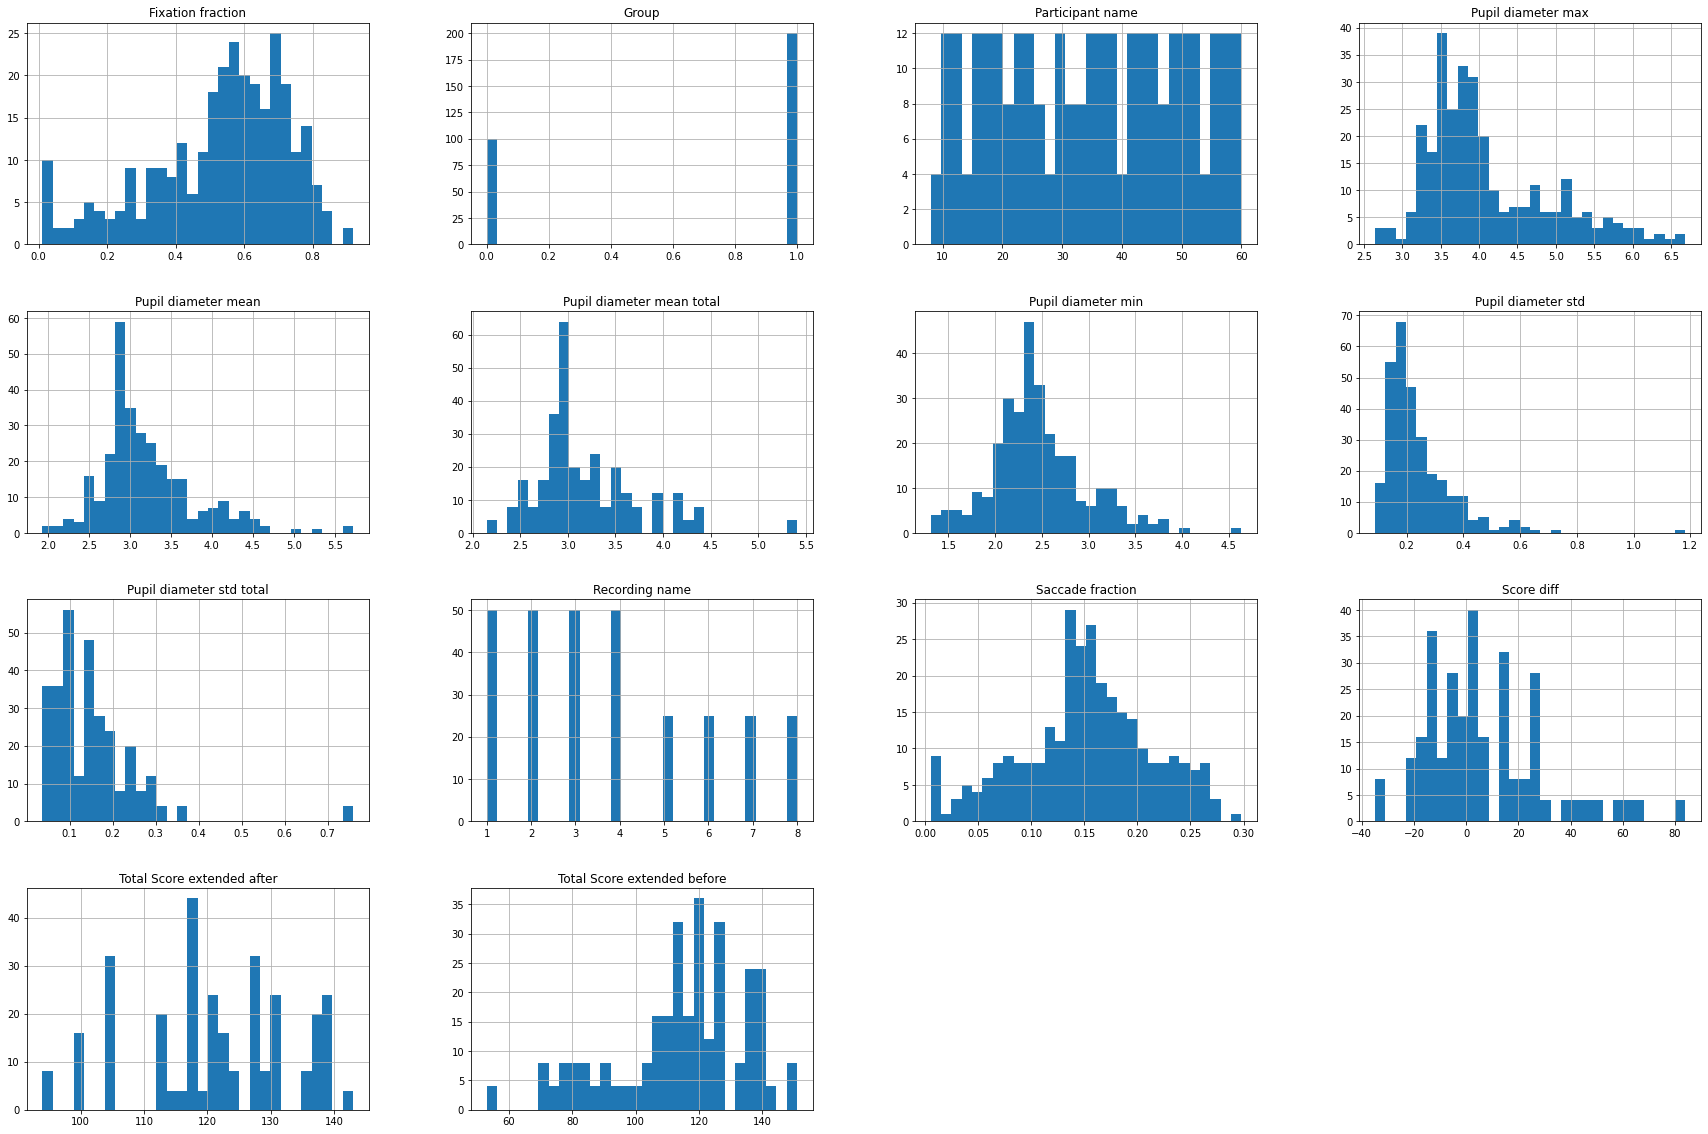

In [10]:
_ = df.hist(bins=30, figsize=(30,20))

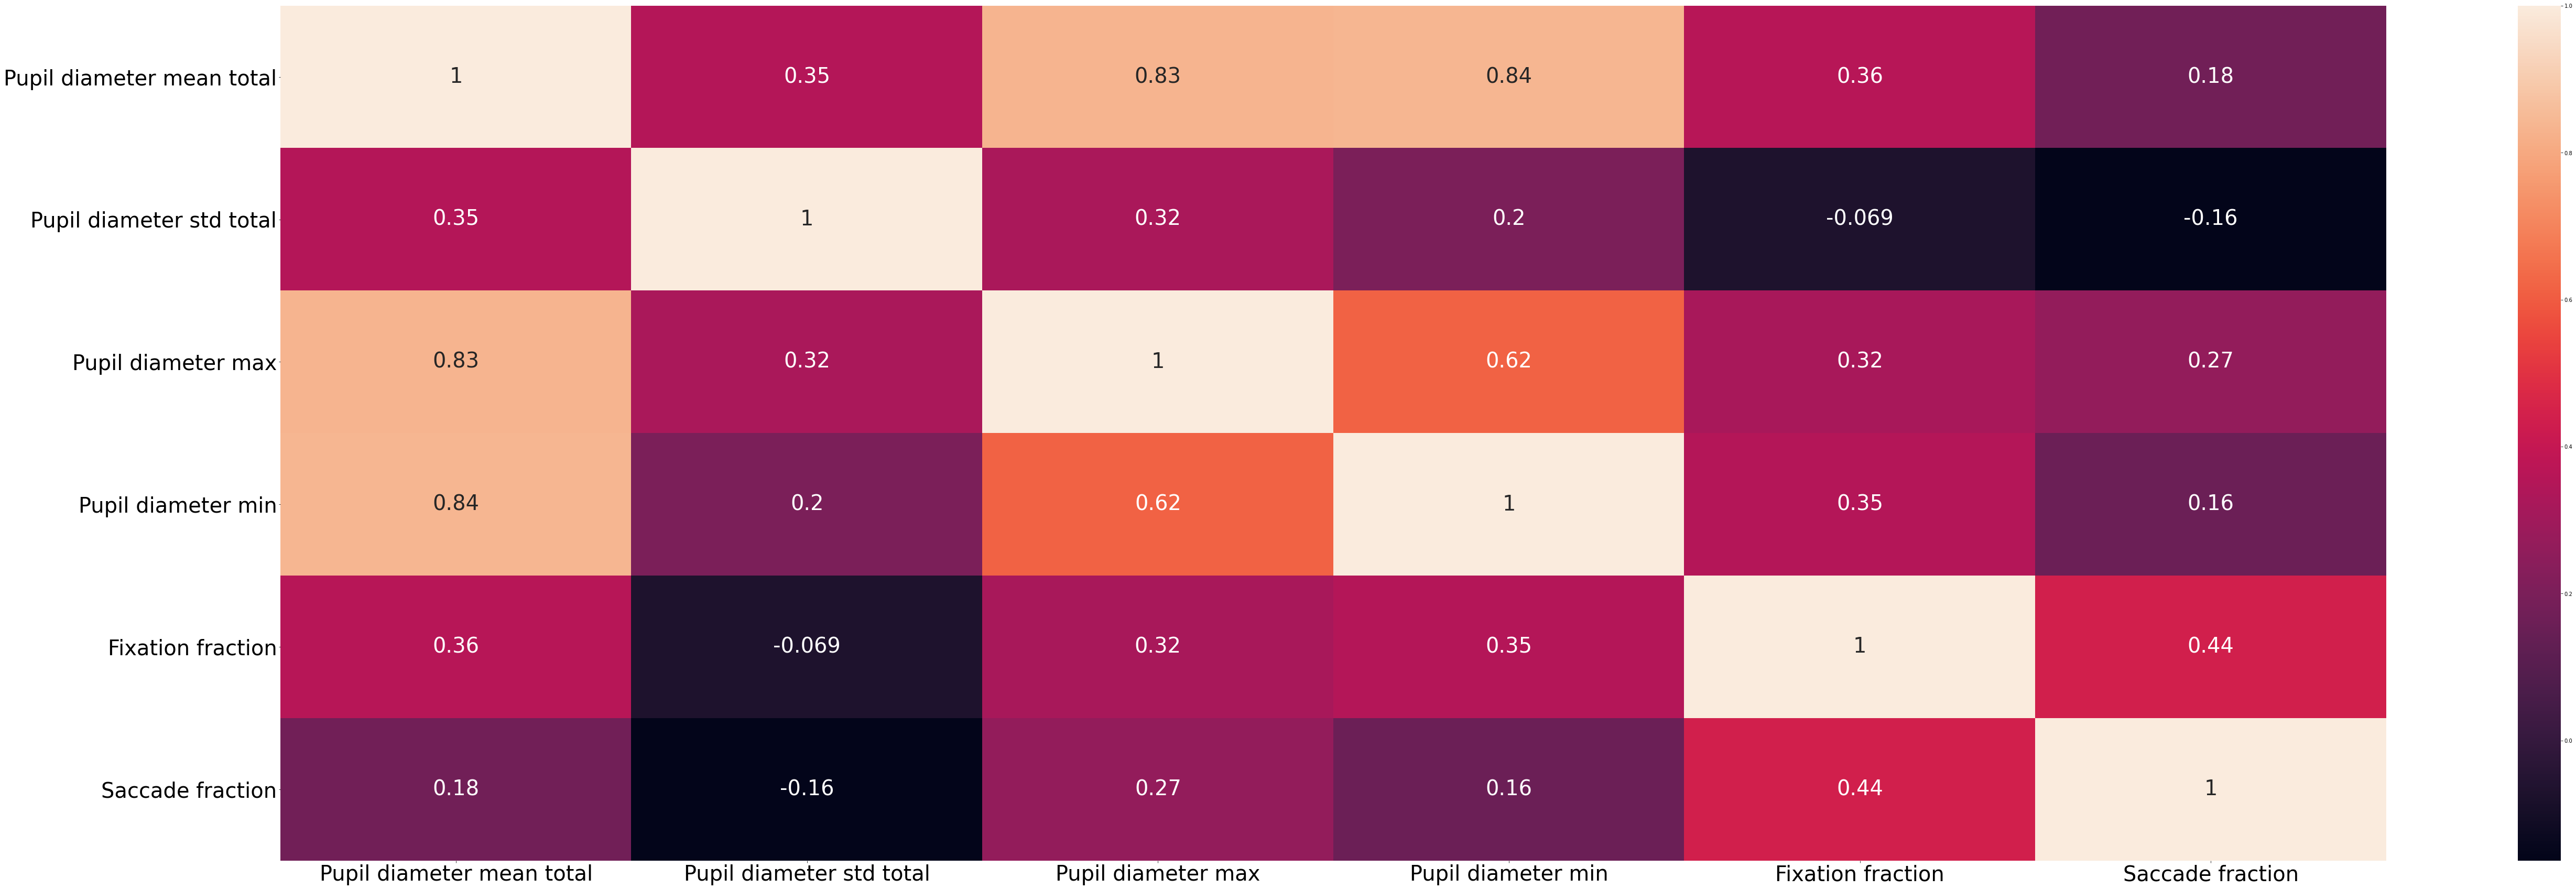

In [161]:
# trend or correlation information simply by using color pairs, and color intensity represent quantity or frequency, especially data that is near -1 or 1, meaning the two are related.
plt.figure(figsize = (90,30))
#data_corr = df.corr()
#data_corr = df[['Pupil diameter mean total', 'Pupil diameter std total','Pupil diameter max', 'Pupil diameter min', 'Fixation fraction', 'Saccade fraction']].corr()
#sns.heatmap(data_corr,xticklabels=data_corr.columns,yticklabels=data_corr.columns,annot=True,annot_kws={"size": 40})

ax = sns.heatmap(data_corr, xticklabels=data_corr.columns, yticklabels=data_corr.columns, 
            annot=True, annot_kws={"size": 40})

ax.set_xticklabels(ax.get_xticklabels(), fontsize=40)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=40,rotation=0)

plt.show()

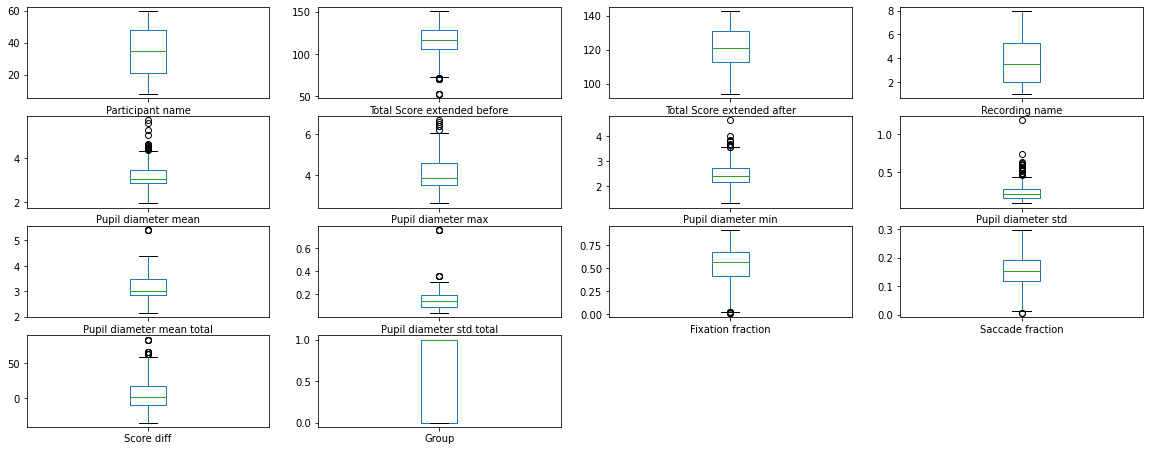

In [12]:
# show box plot to find outlier
df.plot(kind='box', subplots=True, figsize=(20, 40),layout=(20,4))
plt.show()

In [35]:
# Correlations
correlations = df.corr()  # this is a dataframe
# let's see how much each attribute correlates with the outcome 'like'
correlations['Total Score extended after'].sort_values(ascending=False)

Total Score extended after     1.000000
Score diff                     0.456964
Pupil diameter std             0.088951
Total Score extended before    0.080496
Pupil diameter max             0.072612
Pupil diameter std total       0.040201
Pupil diameter mean total      0.020867
Pupil diameter mean            0.019994
Fixation fraction              0.009461
Recording name                -0.029117
Pupil diameter min            -0.032983
Saccade fraction              -0.042188
Group                         -0.067700
Participant name              -0.101686
Name: Total Score extended after, dtype: float64

In [32]:
# select the relevant features
X = df[['Pupil diameter mean', 'Pupil diameter max', 'Pupil diameter min', 'Fixation fraction', 'Saccade fraction', 'Pupil diameter std']]

# set the target variable
y = df['Total Score extended after']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# create and fit the model
#model = LinearRegression()
model = DecisionTreeRegressor()
#model = LogisticRegression()
model.fit(X_train, y_train)

# make predictions on the testing set
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)


Mean Squared Error: 45.36666666666667
Mean Absolute Error: 2.4
R-squared: 0.688816485181057


In [97]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# select the relevant features
#X = df[['Pupil diameter mean', 'Pupil diameter max', 'Pupil diameter min', 'Fixation fraction', 'Saccade fraction', 'Group']]
X = df[['Pupil diameter mean', 'Pupil diameter max', 'Pupil diameter min', 'Fixation fraction', 'Saccade fraction', 'Pupil diameter std']]
# set the target variable
y = df['Total Score extended after']

# create the model
models = [
    DecisionTreeRegressor(),
    LinearRegression(),
    GradientBoostingRegressor(),
    ElasticNet(),
    SGDRegressor(),
    SVR(),
    BayesianRidge(),
    CatBoostRegressor(),
    KernelRidge(),
    XGBRegressor(),
    LGBMRegressor()
]

# set up the KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=5)

# create emthy list
mse_list = []
mae_list = []



# loop over models
for model in models:
# loop over the folds
    for train_index, test_index in kf.split(X):
        # split data into training and testing sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # fit the model
        model.fit(X_train, y_train)

        # make predictions on the testing set
        y_pred = model.predict(X_test)

        # evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

    
        # append the scores to the lists
        mse_list.append(mse)
        mae_list.append(mae)


# calculate the mean of the scores across all folds
mean_mse = sum(mse_list) / len(mse_list)
mean_mae = sum(mae_list) / len(mae_list)
mean_r2 = sum(r2_list) / len(r2_list)

print('Mean Squared Error:', mean_mse)
print('Mean Absolute Error:', mean_mae)
print('R-squared:', mean_r2)


Mean Squared Error: 41.77163728295683
Mean Absolute Error: 4.879092036159285
R-squared: 0.7182559965609064


In [176]:
# select the relevant features
#X = df[['Pupil diameter mean', 'Pupil diameter max', 'Pupil diameter min', 'Fixation fraction', 'Saccade fraction', 'Group']]
#X = df[['Pupil diameter mean total', 'Pupil diameter std total','Pupil diameter max', 'Pupil diameter min', 'Fixation fraction', 'Saccade fraction']]
X = df[['Pupil diameter mean total','Pupil diameter max', 'Pupil diameter min']]

# set the target variable
y = df['Total Score extended after']

# create the model

models = [
    DecisionTreeRegressor(),
    LinearRegression(),
    GradientBoostingRegressor(),
    ElasticNet(),
    SGDRegressor(),
    SVR(),
    BayesianRidge(),
    CatBoostRegressor(),
    KernelRidge(),
    XGBRegressor(),
    LGBMRegressor()
]

# set up the KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=5)

# initial parameters
x = 0
mse_dict = {}
mae_dict = {}
r2 = {}

# loop over models
for model in models:
    mse_list = []
    mae_list = []
    r2_list = []

    # loop over the folds
    for train_index, test_index in kf.split(X):
        # split data into training and testing sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # fit the model
        model.fit(X_train, y_train)

        # make predictions on the testing set
        y_pred = model.predict(X_test)

        # evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
 
    
        # append the scores to the lists
        mse_list.append(mse)
        mae_list.append(mae)
        r2_list.append(r2)
    
        # add the list of scores to the dictionary
        if x == 0:
            model_x = "DecisionTreeRegressor"
        elif x == 1:
            model_x = "LinearRegression"
        elif x == 2:
            model_x = "GradientBoostingRegressor"
        elif x == 3:
            model_x = "ElasticNet"
        elif x == 4:
            model_x = "SGDRegressor"
        elif x == 5:
            model_x = "SVR"
        elif x == 6:
            model_x = "BayesianRidge"
        elif x == 7:
            model_x = "CatBoostRegressor"
        elif x == 8:
            model_x = "KernelRidge"
        elif x == 9:
            model_x = "XGBRegressor"
        elif x == 10:
            model_x = "LGBMRegressor"

        mse_dict.setdefault(model_x, []).append(mse)
        mae_dict.setdefault(model_x, []).append(mae)
        r2_dict.setdefault(model_x, []).append(r2)
    x += 1

print(mse_dict)
print(mae_dict)


Learning rate set to 0.033292
0:	learn: 12.1290720	total: 2.58ms	remaining: 2.58s
1:	learn: 12.0763861	total: 4.47ms	remaining: 2.23s
2:	learn: 12.0180129	total: 5.82ms	remaining: 1.94s
3:	learn: 11.9570146	total: 7.09ms	remaining: 1.76s
4:	learn: 11.9135954	total: 8.74ms	remaining: 1.74s
5:	learn: 11.8396648	total: 9.94ms	remaining: 1.65s
6:	learn: 11.7887321	total: 11.2ms	remaining: 1.59s
7:	learn: 11.7620071	total: 12.8ms	remaining: 1.58s
8:	learn: 11.6991948	total: 14ms	remaining: 1.54s
9:	learn: 11.6196499	total: 15.2ms	remaining: 1.51s
10:	learn: 11.5600372	total: 16.1ms	remaining: 1.45s
11:	learn: 11.5091862	total: 17.2ms	remaining: 1.42s
12:	learn: 11.4711406	total: 18.5ms	remaining: 1.41s
13:	learn: 11.4113943	total: 19.6ms	remaining: 1.38s
14:	learn: 11.3607746	total: 20.6ms	remaining: 1.35s
15:	learn: 11.3177414	total: 21.6ms	remaining: 1.33s
16:	learn: 11.2721156	total: 22.7ms	remaining: 1.31s
17:	learn: 11.2233973	total: 23.9ms	remaining: 1.3s
18:	learn: 11.1923548	total: 

206:	learn: 6.6148496	total: 213ms	remaining: 815ms
207:	learn: 6.6027791	total: 214ms	remaining: 813ms
208:	learn: 6.5830007	total: 215ms	remaining: 812ms
209:	learn: 6.5573699	total: 216ms	remaining: 811ms
210:	learn: 6.5303105	total: 216ms	remaining: 809ms
211:	learn: 6.5104037	total: 217ms	remaining: 808ms
212:	learn: 6.4927135	total: 218ms	remaining: 807ms
213:	learn: 6.4740872	total: 219ms	remaining: 806ms
214:	learn: 6.4595173	total: 220ms	remaining: 805ms
215:	learn: 6.4422367	total: 221ms	remaining: 803ms
216:	learn: 6.4119174	total: 222ms	remaining: 802ms
217:	learn: 6.3828386	total: 223ms	remaining: 801ms
218:	learn: 6.3674402	total: 224ms	remaining: 800ms
219:	learn: 6.3493077	total: 225ms	remaining: 799ms
220:	learn: 6.3212467	total: 226ms	remaining: 798ms
221:	learn: 6.3203622	total: 227ms	remaining: 795ms
222:	learn: 6.2991520	total: 228ms	remaining: 793ms
223:	learn: 6.2849884	total: 229ms	remaining: 792ms
224:	learn: 6.2699063	total: 229ms	remaining: 790ms
225:	learn: 

379:	learn: 4.0139337	total: 382ms	remaining: 623ms
380:	learn: 4.0003885	total: 383ms	remaining: 622ms
381:	learn: 3.9974533	total: 384ms	remaining: 621ms
382:	learn: 3.9845972	total: 385ms	remaining: 620ms
383:	learn: 3.9697900	total: 386ms	remaining: 619ms
384:	learn: 3.9661102	total: 387ms	remaining: 618ms
385:	learn: 3.9607981	total: 388ms	remaining: 617ms
386:	learn: 3.9580421	total: 389ms	remaining: 616ms
387:	learn: 3.9431488	total: 390ms	remaining: 615ms
388:	learn: 3.9306267	total: 391ms	remaining: 614ms
389:	learn: 3.9255743	total: 392ms	remaining: 613ms
390:	learn: 3.9095211	total: 393ms	remaining: 612ms
391:	learn: 3.9068295	total: 394ms	remaining: 611ms
392:	learn: 3.8934733	total: 395ms	remaining: 610ms
393:	learn: 3.8899485	total: 396ms	remaining: 609ms
394:	learn: 3.8878644	total: 397ms	remaining: 607ms
395:	learn: 3.8789033	total: 398ms	remaining: 606ms
396:	learn: 3.8654089	total: 399ms	remaining: 605ms
397:	learn: 3.8552008	total: 399ms	remaining: 604ms
398:	learn: 

547:	learn: 2.7285167	total: 560ms	remaining: 462ms
548:	learn: 2.7251984	total: 561ms	remaining: 461ms
549:	learn: 2.7217353	total: 562ms	remaining: 459ms
550:	learn: 2.7106035	total: 562ms	remaining: 458ms
551:	learn: 2.7027002	total: 563ms	remaining: 457ms
552:	learn: 2.6934360	total: 564ms	remaining: 456ms
553:	learn: 2.6884528	total: 565ms	remaining: 455ms
554:	learn: 2.6802995	total: 565ms	remaining: 453ms
555:	learn: 2.6736397	total: 566ms	remaining: 452ms
556:	learn: 2.6663643	total: 567ms	remaining: 451ms
557:	learn: 2.6596388	total: 567ms	remaining: 449ms
558:	learn: 2.6590313	total: 568ms	remaining: 448ms
559:	learn: 2.6510405	total: 569ms	remaining: 447ms
560:	learn: 2.6499156	total: 570ms	remaining: 446ms
561:	learn: 2.6483040	total: 570ms	remaining: 444ms
562:	learn: 2.6449164	total: 571ms	remaining: 443ms
563:	learn: 2.6354488	total: 572ms	remaining: 442ms
564:	learn: 2.6281481	total: 573ms	remaining: 441ms
565:	learn: 2.6196330	total: 573ms	remaining: 440ms
566:	learn: 

733:	learn: 1.9499858	total: 724ms	remaining: 262ms
734:	learn: 1.9483635	total: 725ms	remaining: 261ms
735:	learn: 1.9474328	total: 725ms	remaining: 260ms
736:	learn: 1.9429097	total: 726ms	remaining: 259ms
737:	learn: 1.9412520	total: 727ms	remaining: 258ms
738:	learn: 1.9383407	total: 728ms	remaining: 257ms
739:	learn: 1.9315246	total: 728ms	remaining: 256ms
740:	learn: 1.9295554	total: 729ms	remaining: 255ms
741:	learn: 1.9268445	total: 729ms	remaining: 254ms
742:	learn: 1.9217194	total: 730ms	remaining: 253ms
743:	learn: 1.9207956	total: 731ms	remaining: 251ms
744:	learn: 1.9188857	total: 732ms	remaining: 250ms
745:	learn: 1.9120032	total: 732ms	remaining: 249ms
746:	learn: 1.9067875	total: 733ms	remaining: 248ms
747:	learn: 1.9038814	total: 734ms	remaining: 247ms
748:	learn: 1.9024100	total: 734ms	remaining: 246ms
749:	learn: 1.9013258	total: 748ms	remaining: 249ms
750:	learn: 1.8991902	total: 749ms	remaining: 248ms
751:	learn: 1.8956169	total: 750ms	remaining: 247ms
752:	learn: 

894:	learn: 1.5562191	total: 887ms	remaining: 104ms
895:	learn: 1.5516116	total: 888ms	remaining: 103ms
896:	learn: 1.5506672	total: 889ms	remaining: 102ms
897:	learn: 1.5502235	total: 889ms	remaining: 101ms
898:	learn: 1.5469593	total: 890ms	remaining: 100ms
899:	learn: 1.5461256	total: 891ms	remaining: 99ms
900:	learn: 1.5432234	total: 891ms	remaining: 97.9ms
901:	learn: 1.5426863	total: 892ms	remaining: 96.9ms
902:	learn: 1.5422857	total: 893ms	remaining: 95.9ms
903:	learn: 1.5384186	total: 893ms	remaining: 94.9ms
904:	learn: 1.5379760	total: 894ms	remaining: 93.8ms
905:	learn: 1.5352792	total: 896ms	remaining: 93ms
906:	learn: 1.5326856	total: 898ms	remaining: 92.1ms
907:	learn: 1.5305160	total: 899ms	remaining: 91.1ms
908:	learn: 1.5277040	total: 900ms	remaining: 90.1ms
909:	learn: 1.5234980	total: 900ms	remaining: 89.1ms
910:	learn: 1.5195047	total: 901ms	remaining: 88ms
911:	learn: 1.5186976	total: 902ms	remaining: 87ms
912:	learn: 1.5161158	total: 902ms	remaining: 86ms
913:	lea

176:	learn: 7.3279570	total: 177ms	remaining: 825ms
177:	learn: 7.3011954	total: 178ms	remaining: 824ms
178:	learn: 7.2882168	total: 179ms	remaining: 822ms
179:	learn: 7.2596000	total: 180ms	remaining: 821ms
180:	learn: 7.2509554	total: 181ms	remaining: 820ms
181:	learn: 7.2235417	total: 182ms	remaining: 819ms
182:	learn: 7.2064085	total: 183ms	remaining: 817ms
183:	learn: 7.1862302	total: 184ms	remaining: 815ms
184:	learn: 7.1766653	total: 185ms	remaining: 813ms
185:	learn: 7.1553665	total: 186ms	remaining: 812ms
186:	learn: 7.1322394	total: 186ms	remaining: 811ms
187:	learn: 7.1189049	total: 187ms	remaining: 809ms
188:	learn: 7.0976356	total: 188ms	remaining: 809ms
189:	learn: 7.0819252	total: 189ms	remaining: 807ms
190:	learn: 7.0689266	total: 190ms	remaining: 806ms
191:	learn: 7.0617853	total: 191ms	remaining: 804ms
192:	learn: 7.0386252	total: 192ms	remaining: 803ms
193:	learn: 7.0254517	total: 193ms	remaining: 802ms
194:	learn: 7.0038360	total: 194ms	remaining: 801ms
195:	learn: 

357:	learn: 4.7967894	total: 346ms	remaining: 620ms
358:	learn: 4.7958173	total: 347ms	remaining: 619ms
359:	learn: 4.7946932	total: 347ms	remaining: 618ms
360:	learn: 4.7937219	total: 348ms	remaining: 616ms
361:	learn: 4.7926481	total: 349ms	remaining: 616ms
362:	learn: 4.7867877	total: 350ms	remaining: 615ms
363:	learn: 4.7800856	total: 351ms	remaining: 614ms
364:	learn: 4.7603090	total: 352ms	remaining: 613ms
365:	learn: 4.7564350	total: 353ms	remaining: 612ms
366:	learn: 4.7554409	total: 354ms	remaining: 610ms
367:	learn: 4.7542049	total: 355ms	remaining: 609ms
368:	learn: 4.7533353	total: 356ms	remaining: 608ms
369:	learn: 4.7365400	total: 357ms	remaining: 607ms
370:	learn: 4.7222125	total: 357ms	remaining: 606ms
371:	learn: 4.7171742	total: 359ms	remaining: 605ms
372:	learn: 4.7108160	total: 359ms	remaining: 604ms
373:	learn: 4.6925421	total: 360ms	remaining: 603ms
374:	learn: 4.6628323	total: 361ms	remaining: 602ms
375:	learn: 4.6590483	total: 362ms	remaining: 601ms
376:	learn: 

536:	learn: 3.2559224	total: 519ms	remaining: 447ms
537:	learn: 3.2396958	total: 520ms	remaining: 446ms
538:	learn: 3.2294744	total: 521ms	remaining: 445ms
539:	learn: 3.2156158	total: 522ms	remaining: 444ms
540:	learn: 3.2139447	total: 522ms	remaining: 443ms
541:	learn: 3.2062640	total: 524ms	remaining: 442ms
542:	learn: 3.1913411	total: 525ms	remaining: 442ms
543:	learn: 3.1835443	total: 526ms	remaining: 441ms
544:	learn: 3.1721788	total: 527ms	remaining: 440ms
545:	learn: 3.1690268	total: 528ms	remaining: 439ms
546:	learn: 3.1614736	total: 528ms	remaining: 438ms
547:	learn: 3.1551493	total: 529ms	remaining: 437ms
548:	learn: 3.1482801	total: 530ms	remaining: 436ms
549:	learn: 3.1478632	total: 531ms	remaining: 434ms
550:	learn: 3.1462040	total: 532ms	remaining: 434ms
551:	learn: 3.1449580	total: 533ms	remaining: 432ms
552:	learn: 3.1375882	total: 534ms	remaining: 431ms
553:	learn: 3.1359809	total: 535ms	remaining: 430ms
554:	learn: 3.1256623	total: 536ms	remaining: 429ms
555:	learn: 

714:	learn: 2.3554914	total: 685ms	remaining: 273ms
715:	learn: 2.3466678	total: 686ms	remaining: 272ms
716:	learn: 2.3403217	total: 687ms	remaining: 271ms
717:	learn: 2.3391289	total: 688ms	remaining: 270ms
718:	learn: 2.3313865	total: 688ms	remaining: 269ms
719:	learn: 2.3285722	total: 689ms	remaining: 268ms
720:	learn: 2.3283709	total: 690ms	remaining: 267ms
721:	learn: 2.3247447	total: 691ms	remaining: 266ms
722:	learn: 2.3235719	total: 692ms	remaining: 265ms
723:	learn: 2.3192350	total: 693ms	remaining: 264ms
724:	learn: 2.3133350	total: 694ms	remaining: 263ms
725:	learn: 2.3075420	total: 694ms	remaining: 262ms
726:	learn: 2.3037455	total: 695ms	remaining: 261ms
727:	learn: 2.2953341	total: 696ms	remaining: 260ms
728:	learn: 2.2897207	total: 697ms	remaining: 259ms
729:	learn: 2.2849562	total: 698ms	remaining: 258ms
730:	learn: 2.2813693	total: 699ms	remaining: 257ms
731:	learn: 2.2757244	total: 700ms	remaining: 256ms
732:	learn: 2.2719319	total: 701ms	remaining: 255ms
733:	learn: 

893:	learn: 1.8037853	total: 852ms	remaining: 101ms
894:	learn: 1.7997978	total: 853ms	remaining: 100ms
895:	learn: 1.7964284	total: 854ms	remaining: 99.1ms
896:	learn: 1.7953090	total: 855ms	remaining: 98.2ms
897:	learn: 1.7917216	total: 856ms	remaining: 97.2ms
898:	learn: 1.7909496	total: 857ms	remaining: 96.3ms
899:	learn: 1.7901295	total: 858ms	remaining: 95.3ms
900:	learn: 1.7871807	total: 859ms	remaining: 94.3ms
901:	learn: 1.7860033	total: 859ms	remaining: 93.4ms
902:	learn: 1.7857946	total: 860ms	remaining: 92.4ms
903:	learn: 1.7821975	total: 861ms	remaining: 91.5ms
904:	learn: 1.7782267	total: 862ms	remaining: 90.5ms
905:	learn: 1.7766785	total: 863ms	remaining: 89.6ms
906:	learn: 1.7754319	total: 864ms	remaining: 88.6ms
907:	learn: 1.7710511	total: 865ms	remaining: 87.7ms
908:	learn: 1.7683321	total: 866ms	remaining: 86.7ms
909:	learn: 1.7671994	total: 867ms	remaining: 85.7ms
910:	learn: 1.7652233	total: 868ms	remaining: 84.8ms
911:	learn: 1.7642749	total: 868ms	remaining: 83

179:	learn: 7.2756938	total: 177ms	remaining: 807ms
180:	learn: 7.2446201	total: 178ms	remaining: 806ms
181:	learn: 7.2341529	total: 179ms	remaining: 804ms
182:	learn: 7.2119219	total: 180ms	remaining: 803ms
183:	learn: 7.1914451	total: 181ms	remaining: 802ms
184:	learn: 7.1852978	total: 182ms	remaining: 800ms
185:	learn: 7.1578037	total: 183ms	remaining: 799ms
186:	learn: 7.1342168	total: 184ms	remaining: 799ms
187:	learn: 7.1230871	total: 185ms	remaining: 798ms
188:	learn: 7.1032071	total: 186ms	remaining: 796ms
189:	learn: 7.0826484	total: 186ms	remaining: 795ms
190:	learn: 7.0539064	total: 187ms	remaining: 794ms
191:	learn: 7.0356861	total: 189ms	remaining: 794ms
192:	learn: 7.0314269	total: 190ms	remaining: 793ms
193:	learn: 7.0203842	total: 191ms	remaining: 792ms
194:	learn: 6.9982107	total: 192ms	remaining: 791ms
195:	learn: 6.9854609	total: 193ms	remaining: 790ms
196:	learn: 6.9695869	total: 194ms	remaining: 789ms
197:	learn: 6.9569044	total: 195ms	remaining: 789ms
198:	learn: 

362:	learn: 4.7537350	total: 345ms	remaining: 605ms
363:	learn: 4.7458674	total: 346ms	remaining: 604ms
364:	learn: 4.7318805	total: 347ms	remaining: 603ms
365:	learn: 4.7308759	total: 348ms	remaining: 602ms
366:	learn: 4.7154094	total: 348ms	remaining: 601ms
367:	learn: 4.6961947	total: 349ms	remaining: 600ms
368:	learn: 4.6781309	total: 350ms	remaining: 599ms
369:	learn: 4.6661455	total: 351ms	remaining: 598ms
370:	learn: 4.6417509	total: 352ms	remaining: 597ms
371:	learn: 4.6289515	total: 353ms	remaining: 595ms
372:	learn: 4.6056413	total: 354ms	remaining: 594ms
373:	learn: 4.5912797	total: 355ms	remaining: 594ms
374:	learn: 4.5761211	total: 356ms	remaining: 593ms
375:	learn: 4.5629510	total: 356ms	remaining: 591ms
376:	learn: 4.5466783	total: 357ms	remaining: 591ms
377:	learn: 4.5364144	total: 358ms	remaining: 590ms
378:	learn: 4.5290468	total: 359ms	remaining: 589ms
379:	learn: 4.5108287	total: 361ms	remaining: 588ms
380:	learn: 4.5005820	total: 362ms	remaining: 587ms
381:	learn: 

548:	learn: 3.0971346	total: 513ms	remaining: 422ms
549:	learn: 3.0926957	total: 514ms	remaining: 421ms
550:	learn: 3.0865015	total: 515ms	remaining: 420ms
551:	learn: 3.0755340	total: 516ms	remaining: 419ms
552:	learn: 3.0611294	total: 517ms	remaining: 418ms
553:	learn: 3.0593188	total: 518ms	remaining: 417ms
554:	learn: 3.0579815	total: 519ms	remaining: 416ms
555:	learn: 3.0535193	total: 520ms	remaining: 415ms
556:	learn: 3.0418763	total: 521ms	remaining: 414ms
557:	learn: 3.0287989	total: 521ms	remaining: 413ms
558:	learn: 3.0207271	total: 522ms	remaining: 412ms
559:	learn: 3.0122869	total: 523ms	remaining: 411ms
560:	learn: 2.9986806	total: 524ms	remaining: 410ms
561:	learn: 2.9905306	total: 525ms	remaining: 409ms
562:	learn: 2.9846582	total: 526ms	remaining: 408ms
563:	learn: 2.9814924	total: 527ms	remaining: 407ms
564:	learn: 2.9798990	total: 527ms	remaining: 406ms
565:	learn: 2.9729309	total: 528ms	remaining: 405ms
566:	learn: 2.9650059	total: 529ms	remaining: 404ms
567:	learn: 

732:	learn: 2.1078436	total: 681ms	remaining: 248ms
733:	learn: 2.1014731	total: 682ms	remaining: 247ms
734:	learn: 2.1000846	total: 682ms	remaining: 246ms
735:	learn: 2.0953555	total: 683ms	remaining: 245ms
736:	learn: 2.0934680	total: 684ms	remaining: 244ms
737:	learn: 2.0879884	total: 685ms	remaining: 243ms
738:	learn: 2.0861488	total: 686ms	remaining: 242ms
739:	learn: 2.0853029	total: 687ms	remaining: 241ms
740:	learn: 2.0794034	total: 688ms	remaining: 240ms
741:	learn: 2.0742127	total: 689ms	remaining: 240ms
742:	learn: 2.0733654	total: 690ms	remaining: 239ms
743:	learn: 2.0708570	total: 691ms	remaining: 238ms
744:	learn: 2.0653050	total: 691ms	remaining: 237ms
745:	learn: 2.0597444	total: 692ms	remaining: 236ms
746:	learn: 2.0538958	total: 693ms	remaining: 235ms
747:	learn: 2.0514573	total: 694ms	remaining: 234ms
748:	learn: 2.0495538	total: 695ms	remaining: 233ms
749:	learn: 2.0449701	total: 696ms	remaining: 232ms
750:	learn: 2.0393559	total: 697ms	remaining: 231ms
751:	learn: 

916:	learn: 1.5870304	total: 851ms	remaining: 77ms
917:	learn: 1.5866007	total: 851ms	remaining: 76.1ms
918:	learn: 1.5832998	total: 852ms	remaining: 75.1ms
919:	learn: 1.5829810	total: 853ms	remaining: 74.2ms
920:	learn: 1.5793533	total: 854ms	remaining: 73.3ms
921:	learn: 1.5749635	total: 855ms	remaining: 72.3ms
922:	learn: 1.5720663	total: 856ms	remaining: 71.4ms
923:	learn: 1.5694767	total: 857ms	remaining: 70.5ms
924:	learn: 1.5669761	total: 858ms	remaining: 69.5ms
925:	learn: 1.5666115	total: 858ms	remaining: 68.6ms
926:	learn: 1.5646326	total: 860ms	remaining: 67.7ms
927:	learn: 1.5611886	total: 861ms	remaining: 66.8ms
928:	learn: 1.5587770	total: 862ms	remaining: 65.9ms
929:	learn: 1.5539043	total: 863ms	remaining: 64.9ms
930:	learn: 1.5494129	total: 864ms	remaining: 64ms
931:	learn: 1.5469884	total: 865ms	remaining: 63.1ms
932:	learn: 1.5444912	total: 866ms	remaining: 62.2ms
933:	learn: 1.5430585	total: 866ms	remaining: 61.2ms
934:	learn: 1.5400811	total: 867ms	remaining: 60.3

192:	learn: 6.7985147	total: 219ms	remaining: 916ms
193:	learn: 6.7697774	total: 220ms	remaining: 913ms
194:	learn: 6.7433940	total: 230ms	remaining: 948ms
195:	learn: 6.7256684	total: 231ms	remaining: 947ms
196:	learn: 6.7024188	total: 232ms	remaining: 944ms
197:	learn: 6.6985876	total: 232ms	remaining: 941ms
198:	learn: 6.6751893	total: 234ms	remaining: 940ms
199:	learn: 6.6709452	total: 235ms	remaining: 940ms
200:	learn: 6.6485270	total: 236ms	remaining: 939ms
201:	learn: 6.6328647	total: 237ms	remaining: 938ms
202:	learn: 6.6014032	total: 262ms	remaining: 1.03s
203:	learn: 6.5716478	total: 263ms	remaining: 1.02s
204:	learn: 6.5485900	total: 264ms	remaining: 1.02s
205:	learn: 6.5242143	total: 264ms	remaining: 1.02s
206:	learn: 6.5199738	total: 265ms	remaining: 1.01s
207:	learn: 6.5049773	total: 266ms	remaining: 1.01s
208:	learn: 6.4982841	total: 266ms	remaining: 1.01s
209:	learn: 6.4753474	total: 267ms	remaining: 1s
210:	learn: 6.4506125	total: 269ms	remaining: 1s
211:	learn: 6.4409

448:	learn: 3.8239016	total: 553ms	remaining: 679ms
449:	learn: 3.8116732	total: 554ms	remaining: 678ms
450:	learn: 3.8048828	total: 555ms	remaining: 676ms
451:	learn: 3.8024735	total: 556ms	remaining: 675ms
452:	learn: 3.7951877	total: 557ms	remaining: 673ms
453:	learn: 3.7837366	total: 558ms	remaining: 672ms
454:	learn: 3.7697356	total: 560ms	remaining: 670ms
455:	learn: 3.7692871	total: 561ms	remaining: 669ms
456:	learn: 3.7661637	total: 561ms	remaining: 667ms
457:	learn: 3.7611402	total: 562ms	remaining: 665ms
458:	learn: 3.7532313	total: 563ms	remaining: 664ms
459:	learn: 3.7492324	total: 564ms	remaining: 662ms
460:	learn: 3.7365387	total: 565ms	remaining: 661ms
461:	learn: 3.7261496	total: 566ms	remaining: 659ms
462:	learn: 3.7166301	total: 567ms	remaining: 657ms
463:	learn: 3.7132842	total: 568ms	remaining: 656ms
464:	learn: 3.7100342	total: 569ms	remaining: 654ms
465:	learn: 3.7069240	total: 569ms	remaining: 653ms
466:	learn: 3.7024036	total: 570ms	remaining: 651ms
467:	learn: 

627:	learn: 2.7585468	total: 722ms	remaining: 428ms
628:	learn: 2.7503590	total: 723ms	remaining: 426ms
629:	learn: 2.7435369	total: 724ms	remaining: 425ms
630:	learn: 2.7430314	total: 725ms	remaining: 424ms
631:	learn: 2.7322974	total: 726ms	remaining: 423ms
632:	learn: 2.7248086	total: 727ms	remaining: 421ms
633:	learn: 2.7245556	total: 728ms	remaining: 420ms
634:	learn: 2.7194065	total: 728ms	remaining: 419ms
635:	learn: 2.7128443	total: 730ms	remaining: 418ms
636:	learn: 2.7111384	total: 730ms	remaining: 416ms
637:	learn: 2.6998962	total: 731ms	remaining: 415ms
638:	learn: 2.6984440	total: 733ms	remaining: 414ms
639:	learn: 2.6982160	total: 734ms	remaining: 413ms
640:	learn: 2.6913705	total: 735ms	remaining: 411ms
641:	learn: 2.6858202	total: 736ms	remaining: 410ms
642:	learn: 2.6822452	total: 737ms	remaining: 409ms
643:	learn: 2.6819498	total: 737ms	remaining: 408ms
644:	learn: 2.6754614	total: 738ms	remaining: 406ms
645:	learn: 2.6744544	total: 739ms	remaining: 405ms
646:	learn: 

808:	learn: 2.0008000	total: 891ms	remaining: 210ms
809:	learn: 1.9968048	total: 892ms	remaining: 209ms
810:	learn: 1.9950489	total: 893ms	remaining: 208ms
811:	learn: 1.9922206	total: 894ms	remaining: 207ms
812:	learn: 1.9891106	total: 895ms	remaining: 206ms
813:	learn: 1.9885942	total: 896ms	remaining: 205ms
814:	learn: 1.9837162	total: 897ms	remaining: 204ms
815:	learn: 1.9808703	total: 898ms	remaining: 202ms
816:	learn: 1.9771387	total: 899ms	remaining: 201ms
817:	learn: 1.9758965	total: 900ms	remaining: 200ms
818:	learn: 1.9742394	total: 901ms	remaining: 199ms
819:	learn: 1.9711684	total: 901ms	remaining: 198ms
820:	learn: 1.9668232	total: 903ms	remaining: 197ms
821:	learn: 1.9658410	total: 904ms	remaining: 196ms
822:	learn: 1.9614789	total: 905ms	remaining: 195ms
823:	learn: 1.9611250	total: 906ms	remaining: 193ms
824:	learn: 1.9597129	total: 907ms	remaining: 192ms
825:	learn: 1.9582916	total: 908ms	remaining: 191ms
826:	learn: 1.9554074	total: 909ms	remaining: 190ms
827:	learn: 

981:	learn: 1.5745650	total: 1.06s	remaining: 19.4ms
982:	learn: 1.5731889	total: 1.06s	remaining: 18.4ms
983:	learn: 1.5730103	total: 1.06s	remaining: 17.3ms
984:	learn: 1.5710046	total: 1.06s	remaining: 16.2ms
985:	learn: 1.5700462	total: 1.06s	remaining: 15.1ms
986:	learn: 1.5698323	total: 1.06s	remaining: 14ms
987:	learn: 1.5692445	total: 1.06s	remaining: 12.9ms
988:	learn: 1.5680650	total: 1.06s	remaining: 11.9ms
989:	learn: 1.5673316	total: 1.07s	remaining: 10.8ms
990:	learn: 1.5641980	total: 1.07s	remaining: 9.7ms
991:	learn: 1.5620415	total: 1.07s	remaining: 8.62ms
992:	learn: 1.5587223	total: 1.07s	remaining: 7.55ms
993:	learn: 1.5575956	total: 1.07s	remaining: 6.47ms
994:	learn: 1.5532099	total: 1.07s	remaining: 5.39ms
995:	learn: 1.5504862	total: 1.07s	remaining: 4.31ms
996:	learn: 1.5488836	total: 1.08s	remaining: 3.24ms
997:	learn: 1.5443995	total: 1.08s	remaining: 2.16ms
998:	learn: 1.5442122	total: 1.08s	remaining: 1.08ms
999:	learn: 1.5415203	total: 1.08s	remaining: 0us

260:	learn: 6.0454759	total: 258ms	remaining: 731ms
261:	learn: 6.0439576	total: 259ms	remaining: 730ms
262:	learn: 6.0428714	total: 260ms	remaining: 730ms
263:	learn: 6.0387109	total: 261ms	remaining: 729ms
264:	learn: 6.0309644	total: 262ms	remaining: 727ms
265:	learn: 6.0281291	total: 263ms	remaining: 726ms
266:	learn: 6.0252263	total: 264ms	remaining: 725ms
267:	learn: 5.9982838	total: 265ms	remaining: 725ms
268:	learn: 5.9686979	total: 266ms	remaining: 724ms
269:	learn: 5.9658701	total: 267ms	remaining: 723ms
270:	learn: 5.9643119	total: 268ms	remaining: 721ms
271:	learn: 5.9378213	total: 269ms	remaining: 720ms
272:	learn: 5.9367152	total: 270ms	remaining: 720ms
273:	learn: 5.9355751	total: 271ms	remaining: 719ms
274:	learn: 5.9343101	total: 272ms	remaining: 717ms
275:	learn: 5.9048521	total: 273ms	remaining: 717ms
276:	learn: 5.9034759	total: 274ms	remaining: 716ms
277:	learn: 5.9019929	total: 275ms	remaining: 715ms
278:	learn: 5.8880614	total: 276ms	remaining: 714ms
279:	learn: 

439:	learn: 3.9829220	total: 428ms	remaining: 544ms
440:	learn: 3.9683917	total: 429ms	remaining: 544ms
441:	learn: 3.9543993	total: 430ms	remaining: 543ms
442:	learn: 3.9489710	total: 431ms	remaining: 542ms
443:	learn: 3.9367024	total: 432ms	remaining: 541ms
444:	learn: 3.9333388	total: 433ms	remaining: 540ms
445:	learn: 3.9223800	total: 434ms	remaining: 539ms
446:	learn: 3.9088247	total: 435ms	remaining: 538ms
447:	learn: 3.9079662	total: 436ms	remaining: 537ms
448:	learn: 3.8915216	total: 437ms	remaining: 536ms
449:	learn: 3.8812389	total: 437ms	remaining: 535ms
450:	learn: 3.8734567	total: 439ms	remaining: 534ms
451:	learn: 3.8701216	total: 439ms	remaining: 533ms
452:	learn: 3.8665994	total: 440ms	remaining: 532ms
453:	learn: 3.8564096	total: 441ms	remaining: 531ms
454:	learn: 3.8560263	total: 442ms	remaining: 530ms
455:	learn: 3.8445079	total: 443ms	remaining: 529ms
456:	learn: 3.8357414	total: 444ms	remaining: 528ms
457:	learn: 3.8251475	total: 445ms	remaining: 527ms
458:	learn: 

619:	learn: 2.6558990	total: 597ms	remaining: 366ms
620:	learn: 2.6471471	total: 598ms	remaining: 365ms
621:	learn: 2.6450395	total: 599ms	remaining: 364ms
622:	learn: 2.6420267	total: 600ms	remaining: 363ms
623:	learn: 2.6350605	total: 601ms	remaining: 362ms
624:	learn: 2.6327406	total: 602ms	remaining: 361ms
625:	learn: 2.6260256	total: 603ms	remaining: 360ms
626:	learn: 2.6192062	total: 604ms	remaining: 360ms
627:	learn: 2.6112244	total: 605ms	remaining: 359ms
628:	learn: 2.6059097	total: 606ms	remaining: 358ms
629:	learn: 2.6029680	total: 607ms	remaining: 357ms
630:	learn: 2.6009192	total: 608ms	remaining: 356ms
631:	learn: 2.5952335	total: 609ms	remaining: 355ms
632:	learn: 2.5924028	total: 610ms	remaining: 354ms
633:	learn: 2.5903511	total: 611ms	remaining: 353ms
634:	learn: 2.5877740	total: 612ms	remaining: 352ms
635:	learn: 2.5808033	total: 613ms	remaining: 351ms
636:	learn: 2.5764095	total: 614ms	remaining: 350ms
637:	learn: 2.5758908	total: 615ms	remaining: 349ms
638:	learn: 

800:	learn: 1.9823351	total: 770ms	remaining: 191ms
801:	learn: 1.9820701	total: 771ms	remaining: 190ms
802:	learn: 1.9788019	total: 772ms	remaining: 189ms
803:	learn: 1.9776700	total: 773ms	remaining: 188ms
804:	learn: 1.9763418	total: 773ms	remaining: 187ms
805:	learn: 1.9721141	total: 774ms	remaining: 186ms
806:	learn: 1.9702588	total: 775ms	remaining: 185ms
807:	learn: 1.9671877	total: 776ms	remaining: 184ms
808:	learn: 1.9660956	total: 777ms	remaining: 183ms
809:	learn: 1.9648607	total: 778ms	remaining: 182ms
810:	learn: 1.9616762	total: 779ms	remaining: 182ms
811:	learn: 1.9599238	total: 780ms	remaining: 181ms
812:	learn: 1.9549760	total: 781ms	remaining: 180ms
813:	learn: 1.9535906	total: 782ms	remaining: 179ms
814:	learn: 1.9525487	total: 783ms	remaining: 178ms
815:	learn: 1.9508636	total: 784ms	remaining: 177ms
816:	learn: 1.9487747	total: 785ms	remaining: 176ms
817:	learn: 1.9448393	total: 786ms	remaining: 175ms
818:	learn: 1.9409914	total: 787ms	remaining: 174ms
819:	learn: 

978:	learn: 1.5465597	total: 942ms	remaining: 20.2ms
979:	learn: 1.5420216	total: 943ms	remaining: 19.2ms
980:	learn: 1.5386181	total: 944ms	remaining: 18.3ms
981:	learn: 1.5380467	total: 945ms	remaining: 17.3ms
982:	learn: 1.5378396	total: 946ms	remaining: 16.4ms
983:	learn: 1.5377187	total: 946ms	remaining: 15.4ms
984:	learn: 1.5363751	total: 948ms	remaining: 14.4ms
985:	learn: 1.5356779	total: 948ms	remaining: 13.5ms
986:	learn: 1.5326726	total: 950ms	remaining: 12.5ms
987:	learn: 1.5296473	total: 950ms	remaining: 11.5ms
988:	learn: 1.5270345	total: 951ms	remaining: 10.6ms
989:	learn: 1.5240475	total: 952ms	remaining: 9.62ms
990:	learn: 1.5208484	total: 953ms	remaining: 8.66ms
991:	learn: 1.5190946	total: 954ms	remaining: 7.7ms
992:	learn: 1.5189223	total: 955ms	remaining: 6.73ms
993:	learn: 1.5182810	total: 956ms	remaining: 5.77ms
994:	learn: 1.5146523	total: 957ms	remaining: 4.81ms
995:	learn: 1.5115013	total: 958ms	remaining: 3.85ms
996:	learn: 1.5080868	total: 959ms	remaining: 2

255:	learn: 5.8933409	total: 234ms	remaining: 680ms
256:	learn: 5.8717583	total: 235ms	remaining: 680ms
257:	learn: 5.8547508	total: 236ms	remaining: 679ms
258:	learn: 5.8278784	total: 237ms	remaining: 678ms
259:	learn: 5.7992252	total: 238ms	remaining: 678ms
260:	learn: 5.7742268	total: 239ms	remaining: 677ms
261:	learn: 5.7625821	total: 240ms	remaining: 676ms
262:	learn: 5.7442994	total: 241ms	remaining: 676ms
263:	learn: 5.7222934	total: 242ms	remaining: 675ms
264:	learn: 5.6959348	total: 243ms	remaining: 674ms
265:	learn: 5.6818404	total: 244ms	remaining: 673ms
266:	learn: 5.6673405	total: 245ms	remaining: 672ms
267:	learn: 5.6534480	total: 245ms	remaining: 670ms
268:	learn: 5.6382852	total: 246ms	remaining: 670ms
269:	learn: 5.6162464	total: 247ms	remaining: 669ms
270:	learn: 5.6028032	total: 248ms	remaining: 668ms
271:	learn: 5.5834712	total: 249ms	remaining: 667ms
272:	learn: 5.5820082	total: 250ms	remaining: 666ms
273:	learn: 5.5592772	total: 251ms	remaining: 666ms
274:	learn: 

436:	learn: 3.6781994	total: 399ms	remaining: 514ms
437:	learn: 3.6735937	total: 400ms	remaining: 514ms
438:	learn: 3.6716512	total: 401ms	remaining: 513ms
439:	learn: 3.6687198	total: 402ms	remaining: 512ms
440:	learn: 3.6649656	total: 403ms	remaining: 511ms
441:	learn: 3.6639355	total: 404ms	remaining: 510ms
442:	learn: 3.6627998	total: 405ms	remaining: 509ms
443:	learn: 3.6532121	total: 406ms	remaining: 508ms
444:	learn: 3.6377198	total: 407ms	remaining: 507ms
445:	learn: 3.6345436	total: 407ms	remaining: 506ms
446:	learn: 3.6249857	total: 408ms	remaining: 505ms
447:	learn: 3.6192874	total: 409ms	remaining: 504ms
448:	learn: 3.6036634	total: 410ms	remaining: 503ms
449:	learn: 3.6016406	total: 411ms	remaining: 502ms
450:	learn: 3.6013098	total: 412ms	remaining: 501ms
451:	learn: 3.6002289	total: 412ms	remaining: 500ms
452:	learn: 3.5989483	total: 413ms	remaining: 499ms
453:	learn: 3.5954066	total: 414ms	remaining: 498ms
454:	learn: 3.5910932	total: 415ms	remaining: 498ms
455:	learn: 

613:	learn: 2.5440423	total: 565ms	remaining: 355ms
614:	learn: 2.5426769	total: 566ms	remaining: 354ms
615:	learn: 2.5392959	total: 567ms	remaining: 353ms
616:	learn: 2.5359305	total: 568ms	remaining: 353ms
617:	learn: 2.5305285	total: 569ms	remaining: 352ms
618:	learn: 2.5267932	total: 570ms	remaining: 351ms
619:	learn: 2.5210469	total: 571ms	remaining: 350ms
620:	learn: 2.5156912	total: 572ms	remaining: 349ms
621:	learn: 2.5127110	total: 573ms	remaining: 348ms
622:	learn: 2.5091487	total: 574ms	remaining: 347ms
623:	learn: 2.4987557	total: 575ms	remaining: 346ms
624:	learn: 2.4894028	total: 576ms	remaining: 345ms
625:	learn: 2.4850853	total: 577ms	remaining: 345ms
626:	learn: 2.4789795	total: 578ms	remaining: 344ms
627:	learn: 2.4733242	total: 579ms	remaining: 343ms
628:	learn: 2.4673801	total: 580ms	remaining: 342ms
629:	learn: 2.4624263	total: 581ms	remaining: 341ms
630:	learn: 2.4555541	total: 581ms	remaining: 340ms
631:	learn: 2.4521241	total: 582ms	remaining: 339ms
632:	learn: 

789:	learn: 1.8862841	total: 734ms	remaining: 195ms
790:	learn: 1.8794028	total: 735ms	remaining: 194ms
791:	learn: 1.8757255	total: 736ms	remaining: 193ms
792:	learn: 1.8728704	total: 737ms	remaining: 192ms
793:	learn: 1.8680974	total: 738ms	remaining: 191ms
794:	learn: 1.8630802	total: 739ms	remaining: 191ms
795:	learn: 1.8579024	total: 741ms	remaining: 190ms
796:	learn: 1.8542788	total: 742ms	remaining: 189ms
797:	learn: 1.8502057	total: 743ms	remaining: 188ms
798:	learn: 1.8489608	total: 744ms	remaining: 187ms
799:	learn: 1.8476284	total: 745ms	remaining: 186ms
800:	learn: 1.8453707	total: 746ms	remaining: 185ms
801:	learn: 1.8412029	total: 748ms	remaining: 185ms
802:	learn: 1.8393482	total: 749ms	remaining: 184ms
803:	learn: 1.8341238	total: 750ms	remaining: 183ms
804:	learn: 1.8328174	total: 751ms	remaining: 182ms
805:	learn: 1.8309367	total: 752ms	remaining: 181ms
806:	learn: 1.8294686	total: 753ms	remaining: 180ms
807:	learn: 1.8261009	total: 754ms	remaining: 179ms
808:	learn: 

966:	learn: 1.4383194	total: 901ms	remaining: 30.7ms
967:	learn: 1.4369836	total: 902ms	remaining: 29.8ms
968:	learn: 1.4350182	total: 903ms	remaining: 28.9ms
969:	learn: 1.4345281	total: 903ms	remaining: 27.9ms
970:	learn: 1.4335910	total: 904ms	remaining: 27ms
971:	learn: 1.4324200	total: 905ms	remaining: 26.1ms
972:	learn: 1.4297428	total: 906ms	remaining: 25.1ms
973:	learn: 1.4277276	total: 907ms	remaining: 24.2ms
974:	learn: 1.4260422	total: 908ms	remaining: 23.3ms
975:	learn: 1.4257366	total: 909ms	remaining: 22.4ms
976:	learn: 1.4250335	total: 910ms	remaining: 21.4ms
977:	learn: 1.4240028	total: 911ms	remaining: 20.5ms
978:	learn: 1.4218807	total: 911ms	remaining: 19.6ms
979:	learn: 1.4202891	total: 912ms	remaining: 18.6ms
980:	learn: 1.4181641	total: 913ms	remaining: 17.7ms
981:	learn: 1.4156838	total: 914ms	remaining: 16.8ms
982:	learn: 1.4139432	total: 915ms	remaining: 15.8ms
983:	learn: 1.4112236	total: 916ms	remaining: 14.9ms
984:	learn: 1.4105650	total: 917ms	remaining: 14

232:	learn: 6.5945959	total: 240ms	remaining: 789ms
233:	learn: 6.5911555	total: 241ms	remaining: 789ms
234:	learn: 6.5893283	total: 242ms	remaining: 788ms
235:	learn: 6.5823715	total: 243ms	remaining: 787ms
236:	learn: 6.5812712	total: 244ms	remaining: 786ms
237:	learn: 6.5799655	total: 245ms	remaining: 784ms
238:	learn: 6.5627255	total: 246ms	remaining: 783ms
239:	learn: 6.5612818	total: 247ms	remaining: 781ms
240:	learn: 6.5583789	total: 248ms	remaining: 780ms
241:	learn: 6.5566107	total: 249ms	remaining: 779ms
242:	learn: 6.5548557	total: 249ms	remaining: 777ms
243:	learn: 6.5508883	total: 250ms	remaining: 776ms
244:	learn: 6.5475058	total: 251ms	remaining: 775ms
245:	learn: 6.5441212	total: 253ms	remaining: 774ms
246:	learn: 6.5428651	total: 254ms	remaining: 773ms
247:	learn: 6.5414748	total: 255ms	remaining: 772ms
248:	learn: 6.5393050	total: 256ms	remaining: 772ms
249:	learn: 6.5381424	total: 257ms	remaining: 771ms
250:	learn: 6.5370188	total: 258ms	remaining: 770ms
251:	learn: 

402:	learn: 4.3664852	total: 408ms	remaining: 605ms
403:	learn: 4.3603097	total: 409ms	remaining: 604ms
404:	learn: 4.3490457	total: 410ms	remaining: 603ms
405:	learn: 4.3341263	total: 411ms	remaining: 602ms
406:	learn: 4.3281976	total: 412ms	remaining: 601ms
407:	learn: 4.3176712	total: 413ms	remaining: 600ms
408:	learn: 4.3141184	total: 414ms	remaining: 598ms
409:	learn: 4.3003916	total: 415ms	remaining: 598ms
410:	learn: 4.2979292	total: 416ms	remaining: 596ms
411:	learn: 4.2902574	total: 417ms	remaining: 595ms
412:	learn: 4.2727654	total: 418ms	remaining: 594ms
413:	learn: 4.2634751	total: 419ms	remaining: 593ms
414:	learn: 4.2574975	total: 420ms	remaining: 592ms
415:	learn: 4.2351046	total: 421ms	remaining: 591ms
416:	learn: 4.2319793	total: 422ms	remaining: 590ms
417:	learn: 4.2179116	total: 423ms	remaining: 589ms
418:	learn: 4.2164192	total: 424ms	remaining: 588ms
419:	learn: 4.2134580	total: 425ms	remaining: 587ms
420:	learn: 4.2119975	total: 426ms	remaining: 586ms
421:	learn: 

576:	learn: 2.9373152	total: 579ms	remaining: 424ms
577:	learn: 2.9290686	total: 580ms	remaining: 424ms
578:	learn: 2.9279808	total: 581ms	remaining: 423ms
579:	learn: 2.9229954	total: 582ms	remaining: 422ms
580:	learn: 2.9197757	total: 583ms	remaining: 420ms
581:	learn: 2.9125570	total: 584ms	remaining: 419ms
582:	learn: 2.9073351	total: 585ms	remaining: 418ms
583:	learn: 2.9052484	total: 586ms	remaining: 417ms
584:	learn: 2.8926770	total: 587ms	remaining: 416ms
585:	learn: 2.8876803	total: 588ms	remaining: 415ms
586:	learn: 2.8829701	total: 588ms	remaining: 414ms
587:	learn: 2.8770566	total: 589ms	remaining: 413ms
588:	learn: 2.8736413	total: 590ms	remaining: 412ms
589:	learn: 2.8717720	total: 591ms	remaining: 411ms
590:	learn: 2.8701323	total: 592ms	remaining: 410ms
591:	learn: 2.8678824	total: 593ms	remaining: 409ms
592:	learn: 2.8626619	total: 594ms	remaining: 407ms
593:	learn: 2.8505683	total: 595ms	remaining: 406ms
594:	learn: 2.8482807	total: 596ms	remaining: 406ms
595:	learn: 

756:	learn: 2.1179790	total: 748ms	remaining: 240ms
757:	learn: 2.1114532	total: 749ms	remaining: 239ms
758:	learn: 2.1083141	total: 750ms	remaining: 238ms
759:	learn: 2.1049605	total: 751ms	remaining: 237ms
760:	learn: 2.1036876	total: 752ms	remaining: 236ms
761:	learn: 2.0987316	total: 753ms	remaining: 235ms
762:	learn: 2.0980194	total: 754ms	remaining: 234ms
763:	learn: 2.0973472	total: 755ms	remaining: 233ms
764:	learn: 2.0931323	total: 756ms	remaining: 232ms
765:	learn: 2.0860942	total: 757ms	remaining: 231ms
766:	learn: 2.0816321	total: 758ms	remaining: 230ms
767:	learn: 2.0773502	total: 759ms	remaining: 229ms
768:	learn: 2.0719000	total: 760ms	remaining: 228ms
769:	learn: 2.0662697	total: 761ms	remaining: 227ms
770:	learn: 2.0656077	total: 761ms	remaining: 226ms
771:	learn: 2.0635548	total: 762ms	remaining: 225ms
772:	learn: 2.0610524	total: 764ms	remaining: 224ms
773:	learn: 2.0529608	total: 765ms	remaining: 223ms
774:	learn: 2.0489623	total: 766ms	remaining: 222ms
775:	learn: 

930:	learn: 1.6544983	total: 920ms	remaining: 68.2ms
931:	learn: 1.6536409	total: 921ms	remaining: 67.2ms
932:	learn: 1.6526888	total: 922ms	remaining: 66.2ms
933:	learn: 1.6517406	total: 923ms	remaining: 65.2ms
934:	learn: 1.6480723	total: 924ms	remaining: 64.2ms
935:	learn: 1.6441458	total: 925ms	remaining: 63.3ms
936:	learn: 1.6435822	total: 926ms	remaining: 62.3ms
937:	learn: 1.6397099	total: 927ms	remaining: 61.3ms
938:	learn: 1.6390790	total: 928ms	remaining: 60.3ms
939:	learn: 1.6355174	total: 929ms	remaining: 59.3ms
940:	learn: 1.6340567	total: 930ms	remaining: 58.3ms
941:	learn: 1.6303358	total: 931ms	remaining: 57.3ms
942:	learn: 1.6294970	total: 932ms	remaining: 56.3ms
943:	learn: 1.6287310	total: 933ms	remaining: 55.3ms
944:	learn: 1.6285082	total: 934ms	remaining: 54.3ms
945:	learn: 1.6244478	total: 935ms	remaining: 53.3ms
946:	learn: 1.6241728	total: 936ms	remaining: 52.4ms
947:	learn: 1.6208339	total: 936ms	remaining: 51.4ms
948:	learn: 1.6186794	total: 937ms	remaining: 

203:	learn: 6.8512769	total: 199ms	remaining: 776ms
204:	learn: 6.8213171	total: 200ms	remaining: 774ms
205:	learn: 6.8032657	total: 201ms	remaining: 773ms
206:	learn: 6.7941554	total: 202ms	remaining: 772ms
207:	learn: 6.7822300	total: 202ms	remaining: 771ms
208:	learn: 6.7568332	total: 203ms	remaining: 770ms
209:	learn: 6.7344986	total: 204ms	remaining: 768ms
210:	learn: 6.7120947	total: 205ms	remaining: 767ms
211:	learn: 6.7048978	total: 206ms	remaining: 766ms
212:	learn: 6.6642221	total: 207ms	remaining: 765ms
213:	learn: 6.6468901	total: 208ms	remaining: 764ms
214:	learn: 6.6358709	total: 209ms	remaining: 763ms
215:	learn: 6.6317801	total: 210ms	remaining: 761ms
216:	learn: 6.6209575	total: 211ms	remaining: 760ms
217:	learn: 6.6162565	total: 212ms	remaining: 759ms
218:	learn: 6.6040659	total: 213ms	remaining: 759ms
219:	learn: 6.5859821	total: 214ms	remaining: 758ms
220:	learn: 6.5714501	total: 215ms	remaining: 757ms
221:	learn: 6.5493352	total: 216ms	remaining: 756ms
222:	learn: 

384:	learn: 4.5817466	total: 366ms	remaining: 585ms
385:	learn: 4.5650833	total: 367ms	remaining: 584ms
386:	learn: 4.5499322	total: 368ms	remaining: 583ms
387:	learn: 4.5377723	total: 369ms	remaining: 582ms
388:	learn: 4.5262221	total: 370ms	remaining: 581ms
389:	learn: 4.5202238	total: 371ms	remaining: 580ms
390:	learn: 4.5059428	total: 372ms	remaining: 579ms
391:	learn: 4.4924667	total: 372ms	remaining: 578ms
392:	learn: 4.4758698	total: 373ms	remaining: 577ms
393:	learn: 4.4684295	total: 374ms	remaining: 576ms
394:	learn: 4.4525124	total: 375ms	remaining: 574ms
395:	learn: 4.4373034	total: 376ms	remaining: 573ms
396:	learn: 4.4256965	total: 377ms	remaining: 572ms
397:	learn: 4.4131893	total: 378ms	remaining: 571ms
398:	learn: 4.4008220	total: 378ms	remaining: 570ms
399:	learn: 4.3785967	total: 379ms	remaining: 569ms
400:	learn: 4.3737060	total: 380ms	remaining: 568ms
401:	learn: 4.3703886	total: 381ms	remaining: 566ms
402:	learn: 4.3693488	total: 382ms	remaining: 566ms
403:	learn: 

566:	learn: 3.0359507	total: 533ms	remaining: 407ms
567:	learn: 3.0285658	total: 534ms	remaining: 406ms
568:	learn: 3.0229823	total: 535ms	remaining: 405ms
569:	learn: 3.0109052	total: 536ms	remaining: 404ms
570:	learn: 3.0026118	total: 537ms	remaining: 403ms
571:	learn: 3.0006357	total: 537ms	remaining: 402ms
572:	learn: 2.9919297	total: 538ms	remaining: 401ms
573:	learn: 2.9813838	total: 539ms	remaining: 400ms
574:	learn: 2.9794030	total: 540ms	remaining: 399ms
575:	learn: 2.9696298	total: 541ms	remaining: 398ms
576:	learn: 2.9661640	total: 542ms	remaining: 397ms
577:	learn: 2.9576492	total: 543ms	remaining: 397ms
578:	learn: 2.9526643	total: 544ms	remaining: 396ms
579:	learn: 2.9480812	total: 545ms	remaining: 395ms
580:	learn: 2.9382766	total: 546ms	remaining: 394ms
581:	learn: 2.9306791	total: 547ms	remaining: 393ms
582:	learn: 2.9261609	total: 547ms	remaining: 392ms
583:	learn: 2.9235435	total: 548ms	remaining: 391ms
584:	learn: 2.9168264	total: 549ms	remaining: 390ms
585:	learn: 

746:	learn: 2.1250072	total: 699ms	remaining: 237ms
747:	learn: 2.1219132	total: 700ms	remaining: 236ms
748:	learn: 2.1155755	total: 701ms	remaining: 235ms
749:	learn: 2.1134479	total: 702ms	remaining: 234ms
750:	learn: 2.1102611	total: 703ms	remaining: 233ms
751:	learn: 2.1063578	total: 704ms	remaining: 232ms
752:	learn: 2.0997498	total: 705ms	remaining: 231ms
753:	learn: 2.0992759	total: 706ms	remaining: 230ms
754:	learn: 2.0929058	total: 707ms	remaining: 229ms
755:	learn: 2.0868240	total: 707ms	remaining: 228ms
756:	learn: 2.0837852	total: 709ms	remaining: 227ms
757:	learn: 2.0795431	total: 710ms	remaining: 227ms
758:	learn: 2.0783083	total: 710ms	remaining: 226ms
759:	learn: 2.0755250	total: 712ms	remaining: 225ms
760:	learn: 2.0713123	total: 712ms	remaining: 224ms
761:	learn: 2.0654182	total: 713ms	remaining: 223ms
762:	learn: 2.0604369	total: 714ms	remaining: 222ms
763:	learn: 2.0557614	total: 715ms	remaining: 221ms
764:	learn: 2.0495109	total: 716ms	remaining: 220ms
765:	learn: 

932:	learn: 1.5994544	total: 863ms	remaining: 62ms
933:	learn: 1.5974214	total: 864ms	remaining: 61.1ms
934:	learn: 1.5953865	total: 865ms	remaining: 60.1ms
935:	learn: 1.5922989	total: 866ms	remaining: 59.2ms
936:	learn: 1.5882683	total: 867ms	remaining: 58.3ms
937:	learn: 1.5879488	total: 867ms	remaining: 57.3ms
938:	learn: 1.5849848	total: 869ms	remaining: 56.4ms
939:	learn: 1.5810345	total: 869ms	remaining: 55.5ms
940:	learn: 1.5805189	total: 870ms	remaining: 54.6ms
941:	learn: 1.5775015	total: 871ms	remaining: 53.6ms
942:	learn: 1.5757944	total: 872ms	remaining: 52.7ms
943:	learn: 1.5732533	total: 873ms	remaining: 51.8ms
944:	learn: 1.5696384	total: 874ms	remaining: 50.8ms
945:	learn: 1.5693616	total: 874ms	remaining: 49.9ms
946:	learn: 1.5660575	total: 875ms	remaining: 49ms
947:	learn: 1.5633760	total: 876ms	remaining: 48.1ms
948:	learn: 1.5622550	total: 877ms	remaining: 47.1ms
949:	learn: 1.5613453	total: 878ms	remaining: 46.2ms
950:	learn: 1.5609949	total: 879ms	remaining: 45.3

221:	learn: 6.5143347	total: 204ms	remaining: 714ms
222:	learn: 6.4991999	total: 205ms	remaining: 714ms
223:	learn: 6.4855908	total: 206ms	remaining: 712ms
224:	learn: 6.4832959	total: 207ms	remaining: 711ms
225:	learn: 6.4554911	total: 207ms	remaining: 710ms
226:	learn: 6.4388047	total: 208ms	remaining: 709ms
227:	learn: 6.4326957	total: 209ms	remaining: 708ms
228:	learn: 6.4255796	total: 210ms	remaining: 707ms
229:	learn: 6.4241025	total: 211ms	remaining: 706ms
230:	learn: 6.4216878	total: 212ms	remaining: 705ms
231:	learn: 6.4174598	total: 213ms	remaining: 704ms
232:	learn: 6.3914182	total: 214ms	remaining: 703ms
233:	learn: 6.3714921	total: 215ms	remaining: 702ms
234:	learn: 6.3480127	total: 215ms	remaining: 701ms
235:	learn: 6.3297263	total: 216ms	remaining: 700ms
236:	learn: 6.3146375	total: 217ms	remaining: 699ms
237:	learn: 6.2955377	total: 218ms	remaining: 698ms
238:	learn: 6.2701221	total: 219ms	remaining: 696ms
239:	learn: 6.2686294	total: 220ms	remaining: 695ms
240:	learn: 

413:	learn: 4.1503078	total: 373ms	remaining: 527ms
414:	learn: 4.1398458	total: 374ms	remaining: 527ms
415:	learn: 4.1184330	total: 375ms	remaining: 526ms
416:	learn: 4.1054382	total: 376ms	remaining: 525ms
417:	learn: 4.0950870	total: 377ms	remaining: 524ms
418:	learn: 4.0776564	total: 378ms	remaining: 523ms
419:	learn: 4.0715109	total: 379ms	remaining: 523ms
420:	learn: 4.0704624	total: 380ms	remaining: 522ms
421:	learn: 4.0674864	total: 381ms	remaining: 521ms
422:	learn: 4.0601091	total: 382ms	remaining: 521ms
423:	learn: 4.0561839	total: 383ms	remaining: 520ms
424:	learn: 4.0362481	total: 383ms	remaining: 519ms
425:	learn: 4.0257366	total: 384ms	remaining: 518ms
426:	learn: 4.0222767	total: 385ms	remaining: 517ms
427:	learn: 4.0083068	total: 386ms	remaining: 516ms
428:	learn: 4.0024050	total: 387ms	remaining: 515ms
429:	learn: 3.9977541	total: 388ms	remaining: 514ms
430:	learn: 3.9920513	total: 389ms	remaining: 513ms
431:	learn: 3.9810197	total: 390ms	remaining: 512ms
432:	learn: 

599:	learn: 2.7617088	total: 540ms	remaining: 360ms
600:	learn: 2.7527321	total: 541ms	remaining: 359ms
601:	learn: 2.7488071	total: 541ms	remaining: 358ms
602:	learn: 2.7443789	total: 542ms	remaining: 357ms
603:	learn: 2.7361329	total: 543ms	remaining: 356ms
604:	learn: 2.7278686	total: 544ms	remaining: 355ms
605:	learn: 2.7248376	total: 545ms	remaining: 354ms
606:	learn: 2.7226681	total: 546ms	remaining: 354ms
607:	learn: 2.7213305	total: 547ms	remaining: 353ms
608:	learn: 2.7180324	total: 548ms	remaining: 352ms
609:	learn: 2.7108700	total: 549ms	remaining: 351ms
610:	learn: 2.6990030	total: 549ms	remaining: 350ms
611:	learn: 2.6918770	total: 550ms	remaining: 349ms
612:	learn: 2.6839192	total: 551ms	remaining: 348ms
613:	learn: 2.6804081	total: 552ms	remaining: 347ms
614:	learn: 2.6787722	total: 553ms	remaining: 346ms
615:	learn: 2.6715748	total: 554ms	remaining: 345ms
616:	learn: 2.6672654	total: 555ms	remaining: 344ms
617:	learn: 2.6573037	total: 556ms	remaining: 344ms
618:	learn: 

777:	learn: 2.0009345	total: 705ms	remaining: 201ms
778:	learn: 1.9965115	total: 706ms	remaining: 200ms
779:	learn: 1.9911380	total: 707ms	remaining: 199ms
780:	learn: 1.9856295	total: 708ms	remaining: 198ms
781:	learn: 1.9844989	total: 709ms	remaining: 198ms
782:	learn: 1.9831937	total: 709ms	remaining: 197ms
783:	learn: 1.9813403	total: 710ms	remaining: 196ms
784:	learn: 1.9752000	total: 712ms	remaining: 195ms
785:	learn: 1.9697413	total: 713ms	remaining: 194ms
786:	learn: 1.9649460	total: 714ms	remaining: 193ms
787:	learn: 1.9609482	total: 715ms	remaining: 192ms
788:	learn: 1.9583658	total: 715ms	remaining: 191ms
789:	learn: 1.9567313	total: 716ms	remaining: 190ms
790:	learn: 1.9521363	total: 717ms	remaining: 190ms
791:	learn: 1.9491015	total: 718ms	remaining: 189ms
792:	learn: 1.9434709	total: 719ms	remaining: 188ms
793:	learn: 1.9420631	total: 720ms	remaining: 187ms
794:	learn: 1.9355859	total: 721ms	remaining: 186ms
795:	learn: 1.9328482	total: 722ms	remaining: 185ms
796:	learn: 

951:	learn: 1.5160045	total: 874ms	remaining: 44.1ms
952:	learn: 1.5147011	total: 875ms	remaining: 43.2ms
953:	learn: 1.5121062	total: 876ms	remaining: 42.2ms
954:	learn: 1.5096143	total: 877ms	remaining: 41.3ms
955:	learn: 1.5090387	total: 878ms	remaining: 40.4ms
956:	learn: 1.5066573	total: 880ms	remaining: 39.6ms
957:	learn: 1.5033763	total: 881ms	remaining: 38.6ms
958:	learn: 1.5021251	total: 883ms	remaining: 37.7ms
959:	learn: 1.5007182	total: 883ms	remaining: 36.8ms
960:	learn: 1.4991013	total: 884ms	remaining: 35.9ms
961:	learn: 1.4964336	total: 885ms	remaining: 34.9ms
962:	learn: 1.4956217	total: 885ms	remaining: 34ms
963:	learn: 1.4939911	total: 887ms	remaining: 33.1ms
964:	learn: 1.4893675	total: 888ms	remaining: 32.2ms
965:	learn: 1.4881161	total: 889ms	remaining: 31.3ms
966:	learn: 1.4857169	total: 890ms	remaining: 30.4ms
967:	learn: 1.4809209	total: 891ms	remaining: 29.4ms
968:	learn: 1.4766652	total: 891ms	remaining: 28.5ms
969:	learn: 1.4761569	total: 900ms	remaining: 27

200:	learn: 7.1189559	total: 203ms	remaining: 805ms
201:	learn: 7.1076048	total: 204ms	remaining: 804ms
202:	learn: 7.0830219	total: 205ms	remaining: 804ms
203:	learn: 7.0525673	total: 206ms	remaining: 804ms
204:	learn: 7.0356387	total: 207ms	remaining: 803ms
205:	learn: 7.0240516	total: 208ms	remaining: 801ms
206:	learn: 6.9923889	total: 209ms	remaining: 800ms
207:	learn: 6.9753838	total: 210ms	remaining: 799ms
208:	learn: 6.9660302	total: 211ms	remaining: 798ms
209:	learn: 6.9521087	total: 212ms	remaining: 797ms
210:	learn: 6.9454864	total: 213ms	remaining: 796ms
211:	learn: 6.9288045	total: 214ms	remaining: 795ms
212:	learn: 6.9081195	total: 215ms	remaining: 794ms
213:	learn: 6.8840553	total: 216ms	remaining: 793ms
214:	learn: 6.8582303	total: 217ms	remaining: 791ms
215:	learn: 6.8357257	total: 217ms	remaining: 789ms
216:	learn: 6.8156715	total: 218ms	remaining: 788ms
217:	learn: 6.7984321	total: 219ms	remaining: 786ms
218:	learn: 6.7946579	total: 220ms	remaining: 786ms
219:	learn: 

372:	learn: 4.8857965	total: 372ms	remaining: 625ms
373:	learn: 4.8688185	total: 373ms	remaining: 624ms
374:	learn: 4.8640941	total: 374ms	remaining: 623ms
375:	learn: 4.8634743	total: 375ms	remaining: 622ms
376:	learn: 4.8617862	total: 376ms	remaining: 621ms
377:	learn: 4.8471438	total: 377ms	remaining: 620ms
378:	learn: 4.8424660	total: 378ms	remaining: 619ms
379:	learn: 4.8375496	total: 378ms	remaining: 617ms
380:	learn: 4.8371050	total: 379ms	remaining: 616ms
381:	learn: 4.8254912	total: 380ms	remaining: 615ms
382:	learn: 4.8117730	total: 382ms	remaining: 615ms
383:	learn: 4.8037632	total: 383ms	remaining: 614ms
384:	learn: 4.7870660	total: 384ms	remaining: 613ms
385:	learn: 4.7832930	total: 385ms	remaining: 612ms
386:	learn: 4.7827265	total: 386ms	remaining: 611ms
387:	learn: 4.7733727	total: 387ms	remaining: 610ms
388:	learn: 4.7600688	total: 388ms	remaining: 609ms
389:	learn: 4.7466915	total: 389ms	remaining: 608ms
390:	learn: 4.7331234	total: 390ms	remaining: 607ms
391:	learn: 

548:	learn: 3.2286906	total: 544ms	remaining: 447ms
549:	learn: 3.2167429	total: 545ms	remaining: 446ms
550:	learn: 3.2036842	total: 546ms	remaining: 445ms
551:	learn: 3.1988577	total: 548ms	remaining: 444ms
552:	learn: 3.1926379	total: 549ms	remaining: 444ms
553:	learn: 3.1821104	total: 550ms	remaining: 443ms
554:	learn: 3.1788376	total: 551ms	remaining: 442ms
555:	learn: 3.1753088	total: 552ms	remaining: 441ms
556:	learn: 3.1728358	total: 553ms	remaining: 440ms
557:	learn: 3.1722490	total: 554ms	remaining: 439ms
558:	learn: 3.1629265	total: 555ms	remaining: 438ms
559:	learn: 3.1578739	total: 556ms	remaining: 437ms
560:	learn: 3.1459244	total: 557ms	remaining: 436ms
561:	learn: 3.1335451	total: 558ms	remaining: 435ms
562:	learn: 3.1249023	total: 559ms	remaining: 434ms
563:	learn: 3.1224563	total: 560ms	remaining: 433ms
564:	learn: 3.1104591	total: 561ms	remaining: 432ms
565:	learn: 3.1040195	total: 562ms	remaining: 431ms
566:	learn: 3.0938976	total: 563ms	remaining: 430ms
567:	learn: 

717:	learn: 2.3556152	total: 711ms	remaining: 279ms
718:	learn: 2.3506978	total: 712ms	remaining: 278ms
719:	learn: 2.3413977	total: 713ms	remaining: 277ms
720:	learn: 2.3370182	total: 714ms	remaining: 276ms
721:	learn: 2.3325598	total: 715ms	remaining: 275ms
722:	learn: 2.3306595	total: 716ms	remaining: 274ms
723:	learn: 2.3236954	total: 717ms	remaining: 273ms
724:	learn: 2.3217940	total: 718ms	remaining: 272ms
725:	learn: 2.3193888	total: 719ms	remaining: 271ms
726:	learn: 2.3164175	total: 720ms	remaining: 270ms
727:	learn: 2.3139708	total: 721ms	remaining: 269ms
728:	learn: 2.3076774	total: 722ms	remaining: 268ms
729:	learn: 2.3061737	total: 723ms	remaining: 267ms
730:	learn: 2.3025023	total: 723ms	remaining: 266ms
731:	learn: 2.3022444	total: 724ms	remaining: 265ms
732:	learn: 2.2976235	total: 725ms	remaining: 264ms
733:	learn: 2.2934967	total: 726ms	remaining: 263ms
734:	learn: 2.2882117	total: 727ms	remaining: 262ms
735:	learn: 2.2847907	total: 728ms	remaining: 261ms
736:	learn: 

891:	learn: 1.7786635	total: 882ms	remaining: 107ms
892:	learn: 1.7780034	total: 883ms	remaining: 106ms
893:	learn: 1.7763069	total: 884ms	remaining: 105ms
894:	learn: 1.7756159	total: 885ms	remaining: 104ms
895:	learn: 1.7743952	total: 886ms	remaining: 103ms
896:	learn: 1.7740101	total: 887ms	remaining: 102ms
897:	learn: 1.7733527	total: 888ms	remaining: 101ms
898:	learn: 1.7721762	total: 889ms	remaining: 99.9ms
899:	learn: 1.7684895	total: 890ms	remaining: 98.9ms
900:	learn: 1.7682468	total: 891ms	remaining: 97.9ms
901:	learn: 1.7679933	total: 892ms	remaining: 96.9ms
902:	learn: 1.7665551	total: 893ms	remaining: 95.9ms
903:	learn: 1.7638041	total: 894ms	remaining: 94.9ms
904:	learn: 1.7624851	total: 895ms	remaining: 94ms
905:	learn: 1.7616863	total: 896ms	remaining: 93ms
906:	learn: 1.7598352	total: 897ms	remaining: 92ms
907:	learn: 1.7572193	total: 898ms	remaining: 91ms
908:	learn: 1.7534346	total: 899ms	remaining: 90ms
909:	learn: 1.7498676	total: 900ms	remaining: 89ms
910:	learn: 

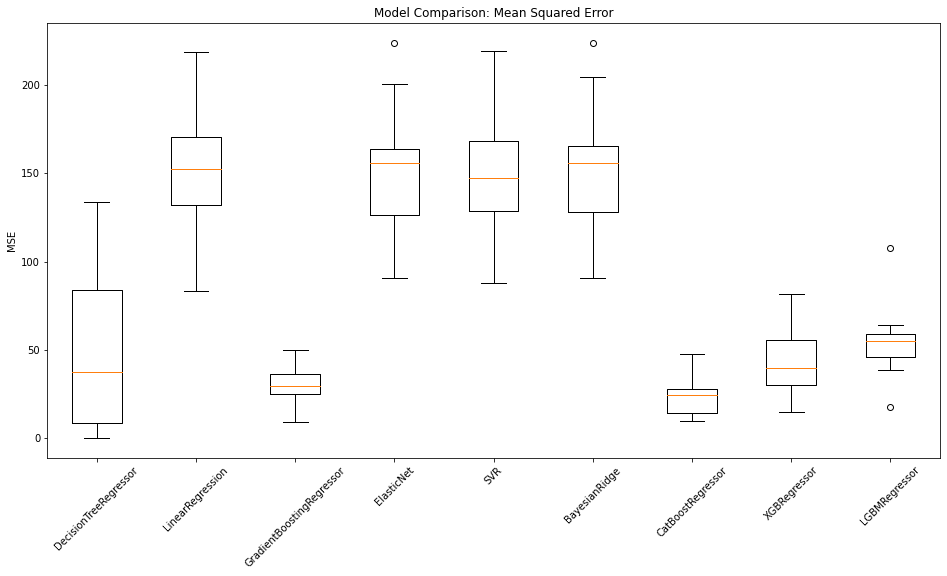

In [177]:
import matplotlib.pyplot as plt

# create a list of MSE scores for each model
mse_data = [mse_dict['DecisionTreeRegressor'],
    mse_dict['LinearRegression'],
    mse_dict['GradientBoostingRegressor'],
    mse_dict['ElasticNet'],
    #mse_dict['SGDRegressor'],
    mse_dict['SVR'],
    mse_dict['BayesianRidge'],
    mse_dict['CatBoostRegressor'],
    #mse_dict['KernelRidge'],
    mse_dict['XGBRegressor'],
    mse_dict['LGBMRegressor']
           ]
# create a list of model names
model_names = ['DecisionTreeRegressor','LinearRegression',    'GradientBoostingRegressor',    'ElasticNet',    'SVR',    'BayesianRidge',    'CatBoostRegressor',    'XGBRegressor',    'LGBMRegressor']
#model_names = ['DecisionTreeRegressor','LinearRegression',    'GradientBoostingRegressor',    'ElasticNet', 'SGDRegressor',   'SVR',    'BayesianRidge',    'CatBoostRegressor', 'KernelRidge',   'XGBRegressor',    'LGBMRegressor']

# create the box plot
fig, ax = plt.subplots(figsize=(16,8))
ax.boxplot(mse_data)
ax.set_xticklabels(model_names, rotation=45)
ax.set_title('Model Comparison: Mean Squared Error')
ax.set_ylabel('MSE')
plt.show()



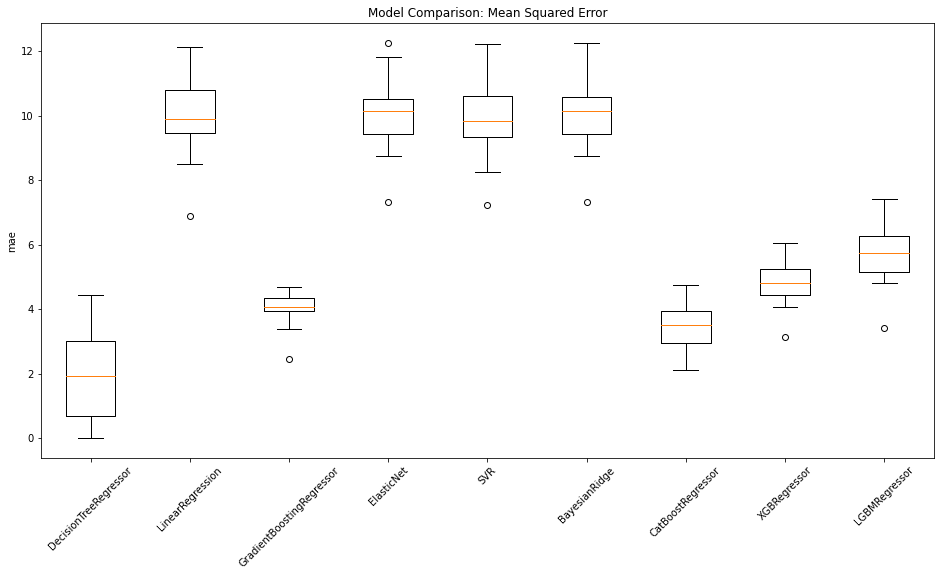

In [178]:
import matplotlib.pyplot as plt

# create a list of mae scores for each model
mae_data = [mae_dict['DecisionTreeRegressor'],
    mae_dict['LinearRegression'],
    mae_dict['GradientBoostingRegressor'],
    mae_dict['ElasticNet'],
    #mae_dict['SGDRegressor'],
    mae_dict['SVR'],
    mae_dict['BayesianRidge'],
    mae_dict['CatBoostRegressor'],
    #mae_dict['KernelRidge'],
    mae_dict['XGBRegressor'],
    mae_dict['LGBMRegressor']
           ]
# create a list of model names
model_names = ['DecisionTreeRegressor','LinearRegression',    'GradientBoostingRegressor',    'ElasticNet',    'SVR',    'BayesianRidge',    'CatBoostRegressor',    'XGBRegressor',    'LGBMRegressor']
#model_names = ['DecisionTreeRegressor','LinearRegression',    'GradientBoostingRegressor',    'ElasticNet', 'SGDRegressor',   'SVR',    'BayesianRidge',    'CatBoostRegressor', 'KernelRidge',   'XGBRegressor',    'LGBMRegressor']

# create the box plot
fig, ax = plt.subplots(figsize=(16,8))
ax.boxplot(mae_data)
ax.set_xticklabels(model_names, rotation=45)
ax.set_title('Model Comparison: Mean Squared Error')
ax.set_ylabel('mae')
plt.show()

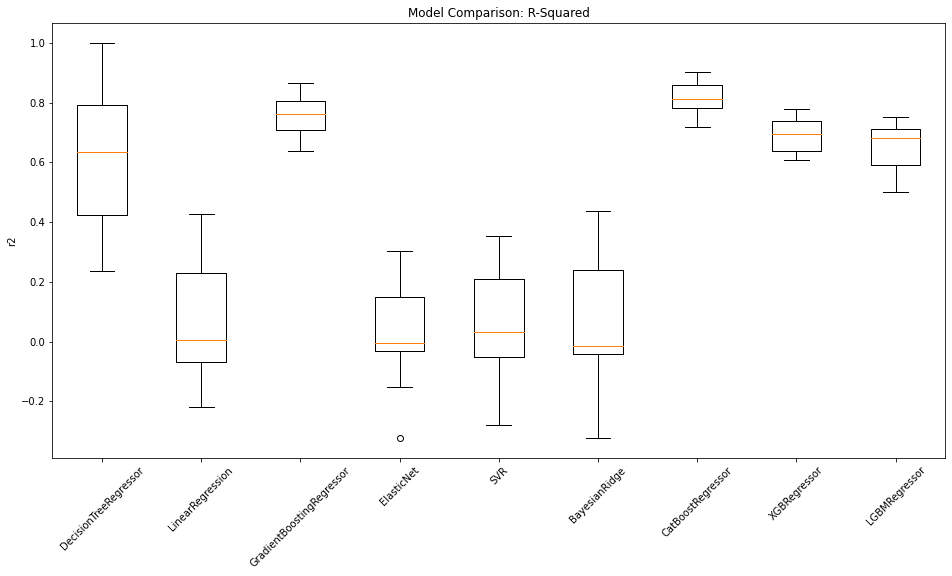

In [179]:
import matplotlib.pyplot as plt

# create a list of r-squared scores for each model
r2_data = [r2_dict['DecisionTreeRegressor'],
    r2_dict['LinearRegression'],
    r2_dict['GradientBoostingRegressor'],
    r2_dict['ElasticNet'],
    #r2_dict['SGDRegressor'],
    r2_dict['SVR'],
    r2_dict['BayesianRidge'],
    r2_dict['CatBoostRegressor'],
    #r2_dict['KernelRidge'],
    r2_dict['XGBRegressor'],
    r2_dict['LGBMRegressor']
           ]

# create a list of model names
#model_names = ['DecisionTreeRegressor','LinearRegression', 'GradientBoostingRegressor', 'ElasticNet', 'SGDRegressor', 'SVR', 'BayesianRidge', 'CatBoostRegressor', 'KernelRidge', 'XGBRegressor', 'LGBMRegressor']
model_names = ['DecisionTreeRegressor','LinearRegression',    'GradientBoostingRegressor',    'ElasticNet',    'SVR',    'BayesianRidge',    'CatBoostRegressor',    'XGBRegressor',    'LGBMRegressor']

# create the box plot
fig, ax = plt.subplots(figsize=(16,8))
ax.boxplot(r2_data)
ax.set_xticklabels(model_names, rotation=45)
ax.set_title('Model Comparison: R-Squared')
ax.set_ylabel('r2')
plt.show()


In [170]:
mae_dict['SGDRegressor']

[11.692922174576642,
 16.3558158658938,
 11.657831921342437,
 11.520691734987908,
 12.30465314353279,
 12.96922567927149,
 11.294776506052093,
 15.93424239974352,
 10.024390655366627,
 7.198844041340535]

In [180]:
# calculate the average of each list
mse_averages = []
mae_averages = []
r2_averages = []
for lst in mse_data:
    mse_avg = sum(lst) / len(lst)
    mse_averages.append(mse_avg)

for lst in mae_data:
    mae_avg = sum(lst) / len(lst)
    mae_averages.append(mae_avg)
    
for lst in r2_data:
    r2_avg = sum(lst) / len(lst)
    r2_averages.append(r2_avg)
    

print(mse_averages)
print(mae_averages)
print(r2_averages)

[49.220000000000006, 151.50176054921775, 30.043099559076154, 151.87769419901298, 149.94101624920282, 152.7190352790364, 24.274349910286233, 43.35922138844558, 55.348990774609696]
[1.9666666666666663, 9.973404859689062, 3.9814637806342232, 10.053903037888904, 9.907262176137902, 10.087230938209611, 3.4674375578534886, 4.799060846964518, 5.6527169907954375]
[0.6433479150701609, 0.057442165609868805, 0.7611008439651827, 0.026628923421243494, 0.05666089491485763, 0.050432159577970585, 0.8177622610714331, 0.6920791471756204, 0.6548732128935633]


In [181]:
# create dataframe to display actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# display the dataframe
print(results_df)

     Actual   Predicted
5       117  122.150094
7       117  111.042003
8       128  126.749702
27      105  112.901198
30      124  124.867892
41      120  120.224428
44      139  133.149970
65      121  125.030357
73      117  116.589454
80      128  130.944203
86      128  133.984373
103     113  110.540208
112     118  123.496704
113     118  116.149299
118     118  114.817331
125     121  120.363615
137     100  106.338314
144     104  110.794205
146     104  113.032516
158     117  116.334600
189     123  128.861981
203     121  117.931045
204     113  114.071912
205     113  114.071912
206     113  113.653328
208     113  108.523825
210     113  114.647297
228     121  122.895523
231     121  122.895523
254     104  108.112276


In [184]:
df.columns

Index(['Participant name', 'Total Score extended before',
       'Total Score extended after', 'Recording name', 'Pupil diameter mean',
       'Pupil diameter max', 'Pupil diameter min', 'Pupil diameter std',
       'Pupil diameter mean total', 'Pupil diameter std total',
       'Fixation fraction', 'Saccade fraction', 'Score diff', 'Group'],
      dtype='object')